## Análisis de sastifacción de los clientes
Este conjunto de datos captura las puntuaciones de satisfacción del cliente durante un período de un mes en una plataforma de comercio electrónico llamada Shopzilla (un seudónimo). Incluye varias características como la categoría y subcategoría de la interacción, comentarios del cliente, fecha de  respuesta a la encuesta, categoría, precio del artículo, detalles del agente (nombre, supervisor, gerente), y la puntuación de satisfacción del cliente (CSAT), entre otros.  


### Descripción de los Datos

| Nombre de la Columna          | Descripción                                            |
|-------------------------------|--------------------------------------------------------|
| **Unique id**                 | Identificador único para cada registro                 |
| **Channel name**              | Nombre del canal de servicio al cliente                |
| **Category**                  | Categoría de la interacción                            |
| **Sub-category**              | Subcategoría de la interacción                         |
| **Customer Remarks**          | Comentarios proporcionados por el cliente              |
| **Order id**                  | Identificador del pedido asociado con la interacción   |
| **Order date time**           | Fecha y hora del pedido                                |
| **Issue reported at**         | Marca de tiempo cuando se reportó el problema          |
| **Issue responded**           | Marca de tiempo cuando se respondió al problema        |
| **Survey response date**      | Fecha de respuesta de la encuesta del cliente          |
| **Customer city**             | Ciudad del cliente                                     |
| **Product category**          | Categoría del producto                                 |
| **Item price**                | Precio del artículo                                    |
| **Connected handling time**   | Tiempo tomado para manejar la interacción              |
| **Agent name**                | Nombre del agente de servicio al cliente               |
| **Supervisor**                | Nombre del supervisor                                  |
| **Manager**                   | Nombre del gerente                                     |
| **Tenure Bucket**             | Categoría de la antigüedad del agente                  |
| **Agent Shift**               | Horario de turno del agente                            |
| **CSAT Score**                | Puntuación de Satisfacción del Cliente (CSAT)          |

In [1]:
## Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning) 
sns.set(style='whitegrid')

In [2]:
## Cargar datos 


data = pd.read_csv('../data/raw/Customer_support_data.csv')
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [3]:
data.shape

(85907, 20)

In [4]:
# Se obtiene una fracción de la muestra del 30% para el análisis
porcentaje = 1
data = data.sample(frac=porcentaje)

In [5]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 7568 to 54036
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name              

In [6]:
## Tipos de datos
data.dtypes.value_counts()

object     17
float64     2
int64       1
Name: count, dtype: int64

#### Cantidad variables categóricas y numéricas
- 12 variables categóricas 
- 3 variables numéricas

In [7]:
## Verificar datos duplicados
data.duplicated().sum()

0

In [8]:
## Elimanar la columna "Unique id", no se necesita para nuestro análisis
data.drop('Unique id',axis=1,inplace=True)

### Estudio de datos nulos

In [9]:
## Varificación de datos nulos
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({
    'Valores Nulos': missing_values,
    'Porcentaje Nulos (%)': missing_percentage
})

missing_data[missing_data['Valores Nulos']>0]

,Valores Nulos,Porcentaje Nulos (%)
Customer Remarks,57165,66.542889
Order_id,18232,21.222950
order_date_time,68693,79.962052
Customer_City,68828,80.119199
Product_category,68711,79.983005
Item_price,68701,79.971364
connected_handling_time,85665,99.718300


se decide eliminar las columnas con valores nulos, por tenes un porcentaje de más del 60% de los valores nulos
aunque en análisis posteriores se tendra en cuenta. Como el item_price y customer Remarks

In [10]:
nulos_column = missing_data[missing_data['Valores Nulos'] > 0].index

data.drop(nulos_column,axis=1,inplace=True)

### Variables Temporales

In [11]:
data.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score'],
      dtype='object')

In [12]:
data['Survey_response_Date']

7568     04-Aug-23
24201    10-Aug-23
82980    30-Aug-23
66704    25-Aug-23
55614    21-Aug-23
           ...    
74251    28-Aug-23
40000    14-Aug-23
56348    22-Aug-23
39681    14-Aug-23
54036    21-Aug-23
Name: Survey_response_Date, Length: 85907, dtype: object

In [13]:
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], format='%d/%m/%Y %H:%M')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], format='%d/%m/%Y %H:%M')
data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'], format='%d-%b-%y')



In [14]:
# Extraer minutos y segundos de 'Issue_reported at'
# Extraer componentes temporales de 'Issue_reported at'
data['issue_reported_year'] = data['Issue_reported at'].dt.year
data['issue_reported_month'] = data['Issue_reported at'].dt.month
data['issue_reported_day'] = data['Issue_reported at'].dt.day
data['issue_reported_hour'] = data['Issue_reported at'].dt.hour

# Extraer componentes temporales de 'issue_responded'
data['issue_responded_year'] = data['issue_responded'].dt.year
data['issue_responded_month'] = data['issue_responded'].dt.month
data['issue_responded_day'] = data['issue_responded'].dt.day
data['issue_responded_hour'] = data['issue_responded'].dt.hour

# Extraer componentes temporales de 'Survey_response_Date'
data['survey_response_year'] = data['Survey_response_Date'].dt.year
data['survey_response_month'] = data['Survey_response_Date'].dt.month
data['survey_response_day'] = data['Survey_response_Date'].dt.day
data['survey_response_hour'] = data['Survey_response_Date'].dt.hour


Eliminamos las columnas originales 


In [15]:
data.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'issue_reported_year', 'issue_reported_month', 'issue_reported_day',
       'issue_reported_hour', 'issue_responded_year', 'issue_responded_month',
       'issue_responded_day', 'issue_responded_hour', 'survey_response_year',
       'survey_response_month', 'survey_response_day', 'survey_response_hour'],
      dtype='object')

In [16]:
colum_date = ['Issue_reported at','issue_responded','Survey_response_Date']
data.drop(colum_date,axis=1, inplace=True)

## Análisis Univariado

### Categórica

In [17]:

for column in data.columns:
    unique_elements = data[column].nunique()
    print(f'La categoría de "{column}" tiene los siguientes elementos únicos: {unique_elements}')


La categoría de "channel_name" tiene los siguientes elementos únicos: 3
La categoría de "category" tiene los siguientes elementos únicos: 12
La categoría de "Sub-category" tiene los siguientes elementos únicos: 57
La categoría de "Agent_name" tiene los siguientes elementos únicos: 1371
La categoría de "Supervisor" tiene los siguientes elementos únicos: 40
La categoría de "Manager" tiene los siguientes elementos únicos: 6
La categoría de "Tenure Bucket" tiene los siguientes elementos únicos: 5
La categoría de "Agent Shift" tiene los siguientes elementos únicos: 5
La categoría de "CSAT Score" tiene los siguientes elementos únicos: 5
La categoría de "issue_reported_year" tiene los siguientes elementos únicos: 1
La categoría de "issue_reported_month" tiene los siguientes elementos únicos: 2
La categoría de "issue_reported_day" tiene los siguientes elementos únicos: 31
La categoría de "issue_reported_hour" tiene los siguientes elementos únicos: 24
La categoría de "issue_responded_year" tien

In [18]:
for column in data.columns:
    print(f"Frecuencias absolutas para {column}:\n{data[column].value_counts()}\n")

Frecuencias absolutas para channel_name:
channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

Frecuencias absolutas para category:
category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64

Frecuencias absolutas para Sub-category:
Sub-category
Reverse Pickup Enquiry              22389
Return request                       8523
Delayed                              7388
Order status enquiry                 6922
Installation/demo                    4116
Fraudulent User                      4108
Product Specific Information         3589
Refund Enquiry                       2665
Wrong                                2597
Missing                    

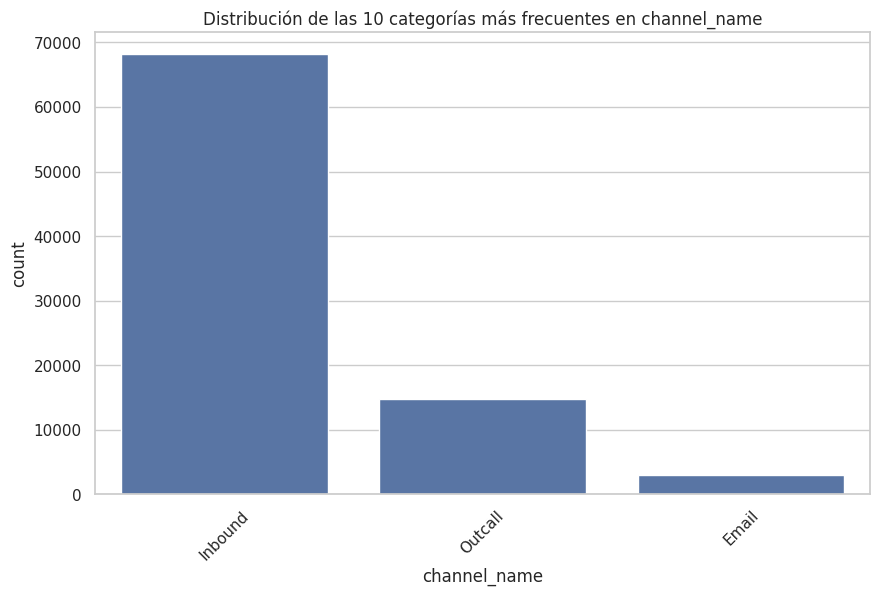

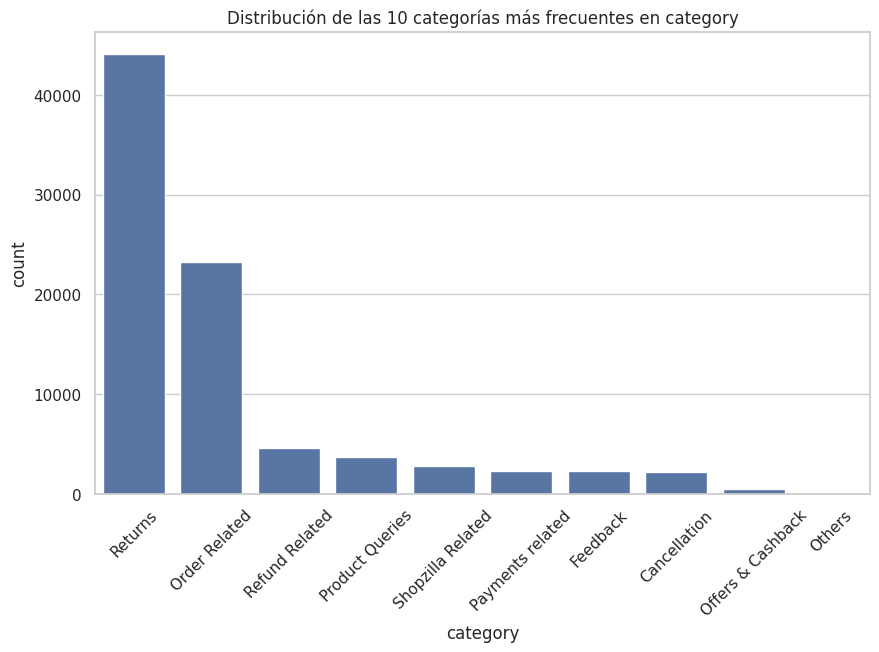

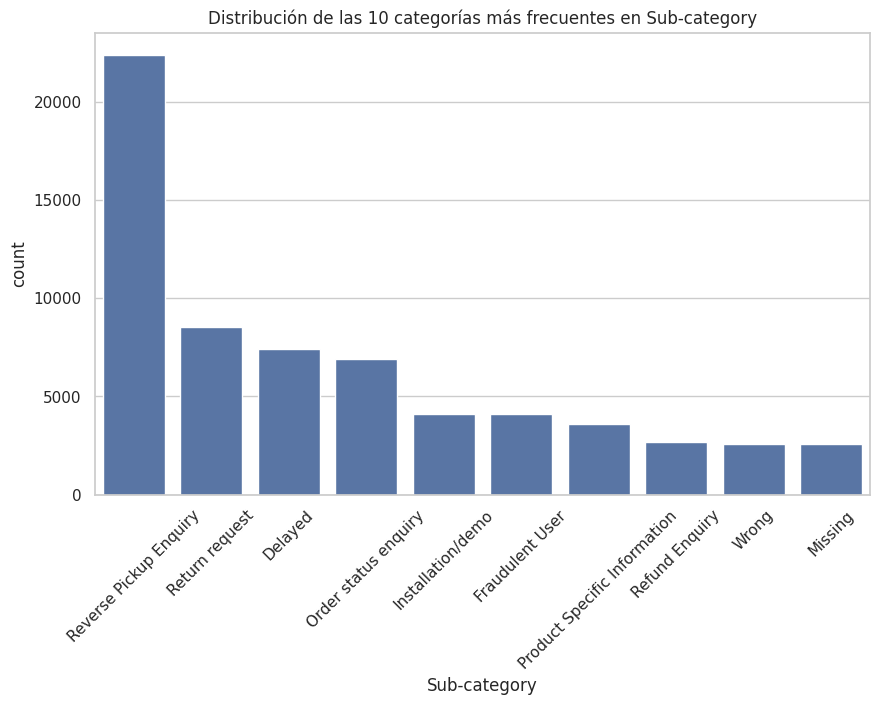

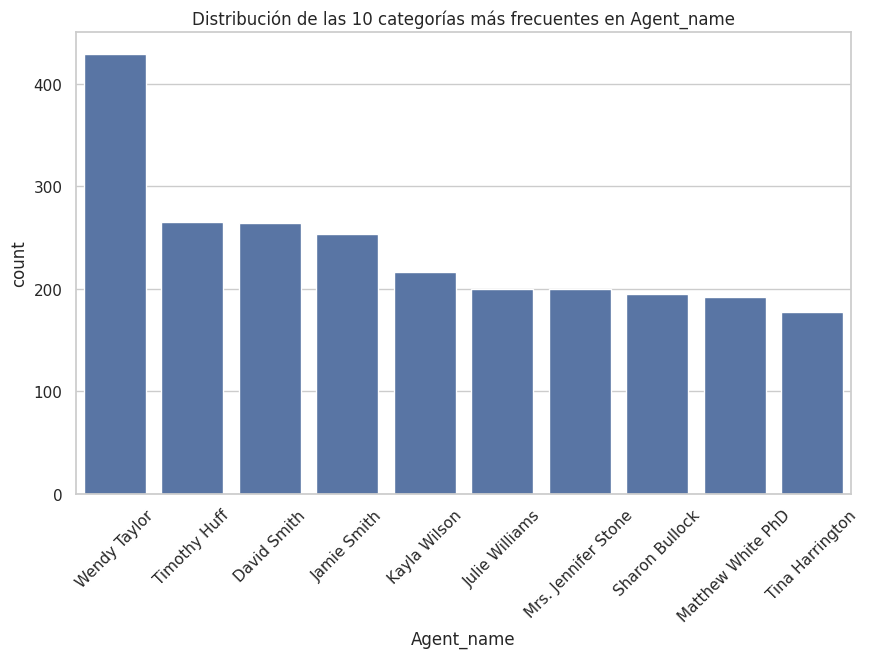

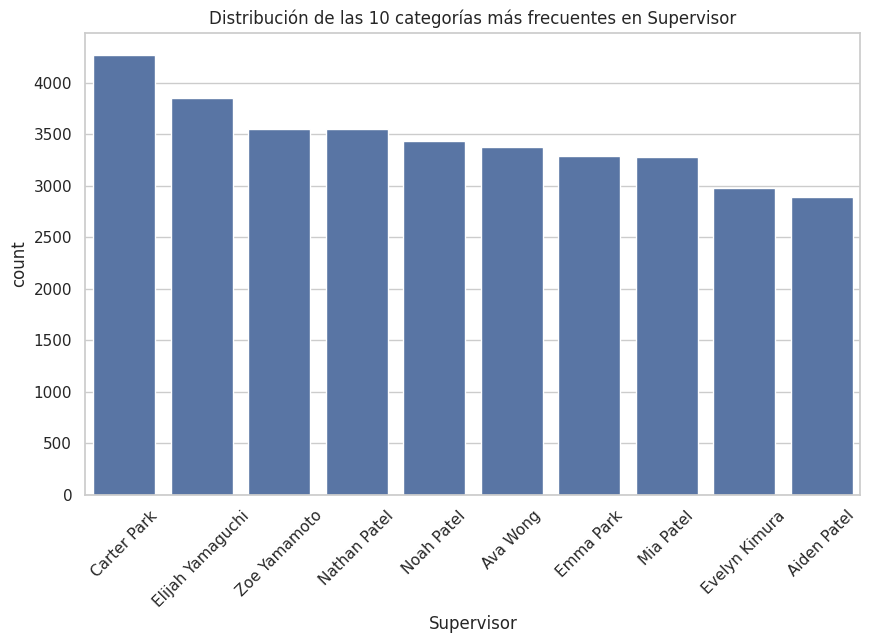

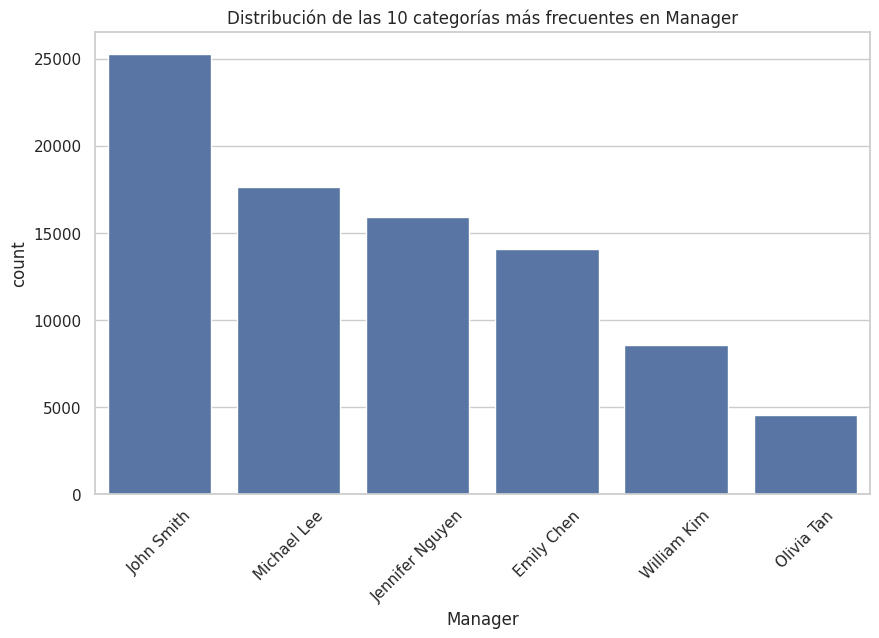

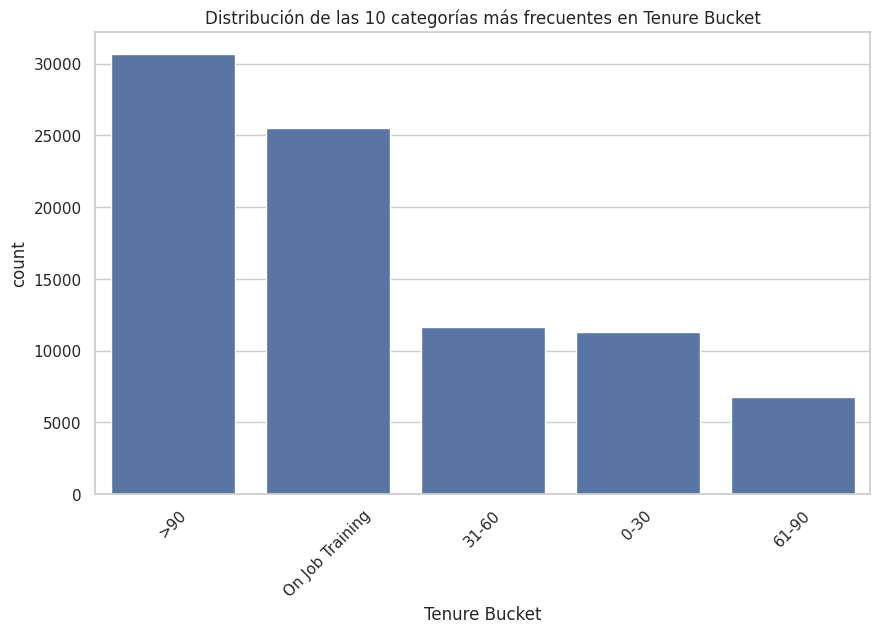

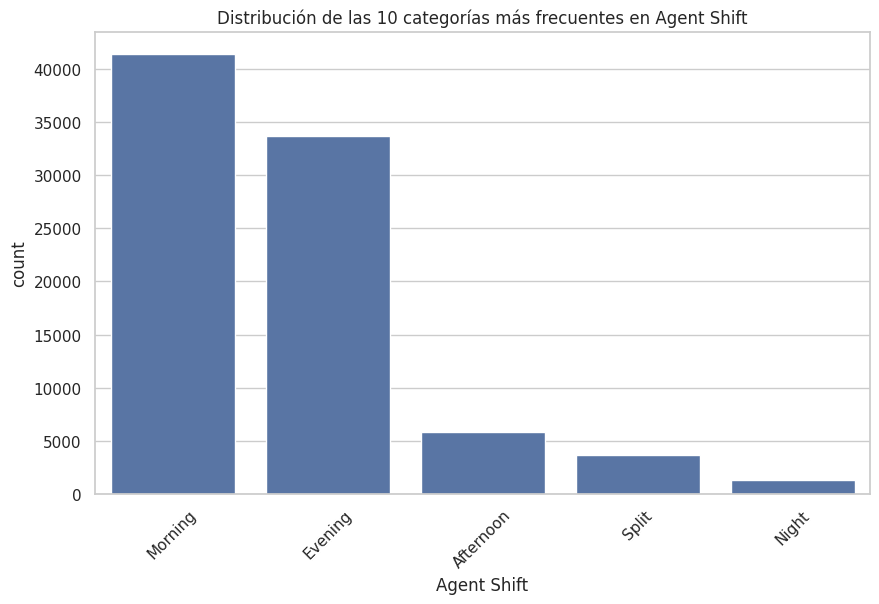

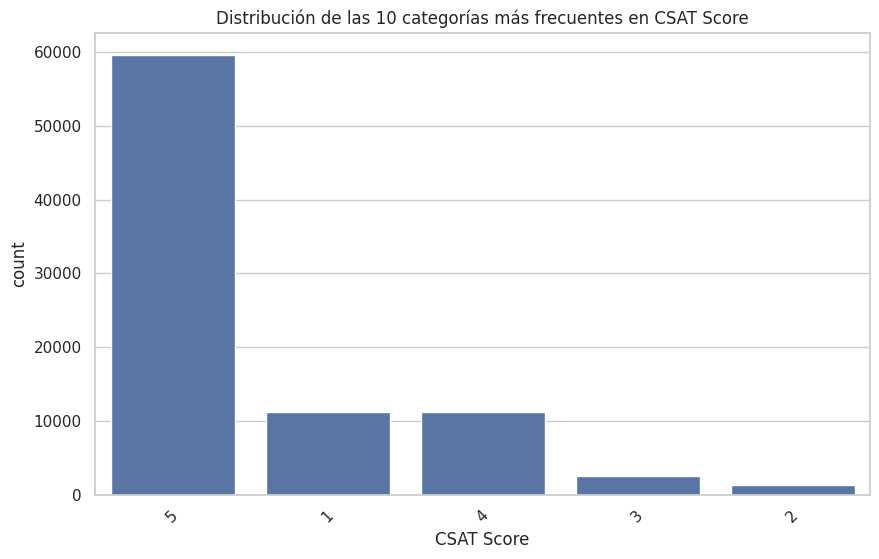

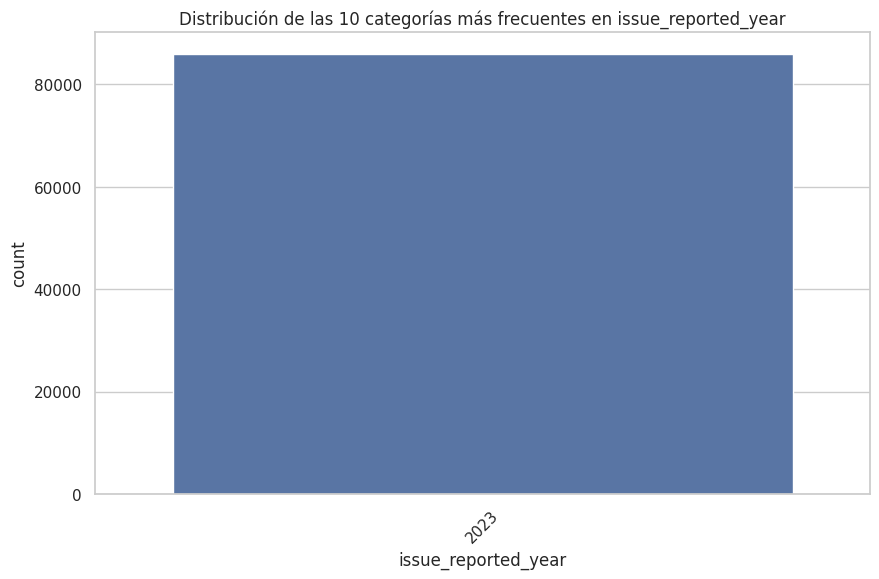

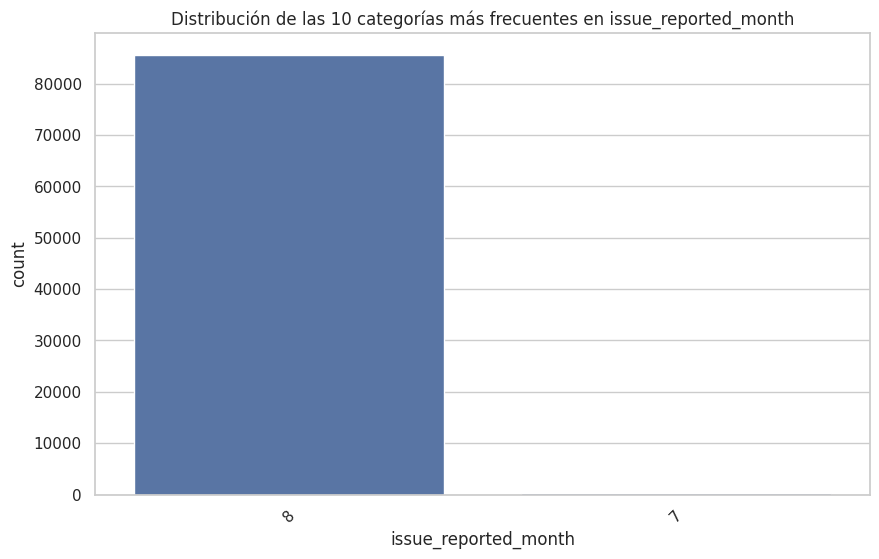

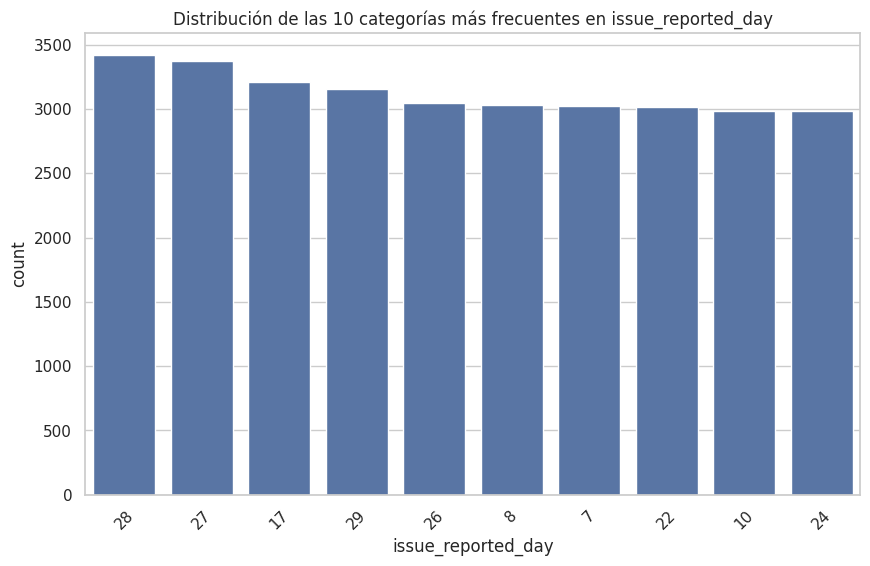

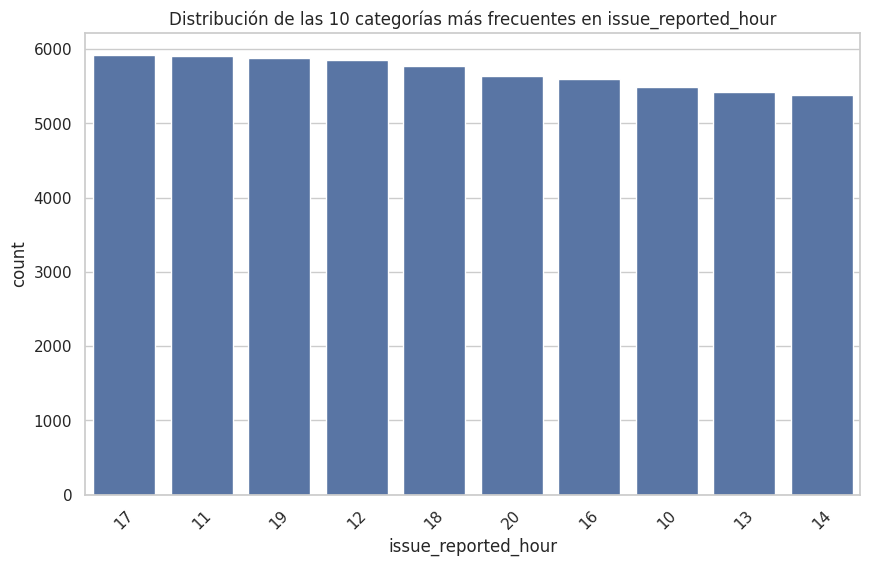

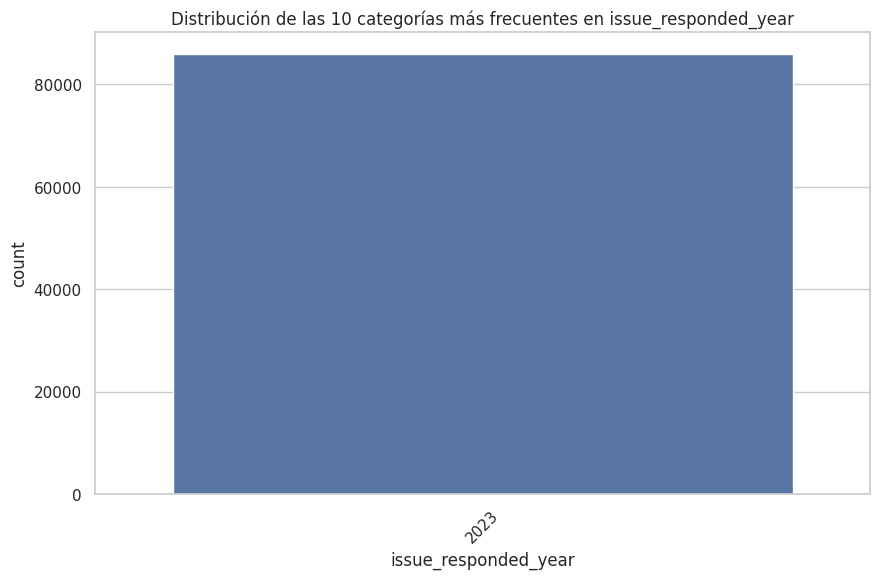

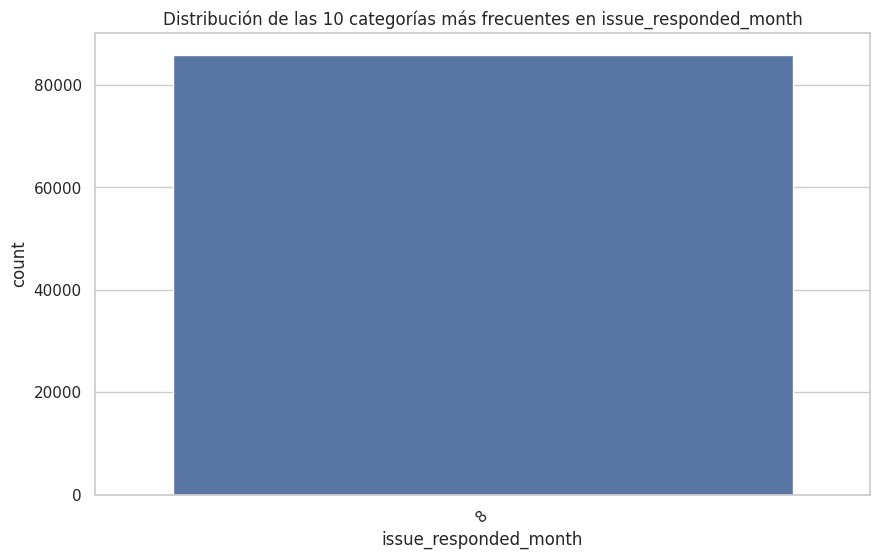

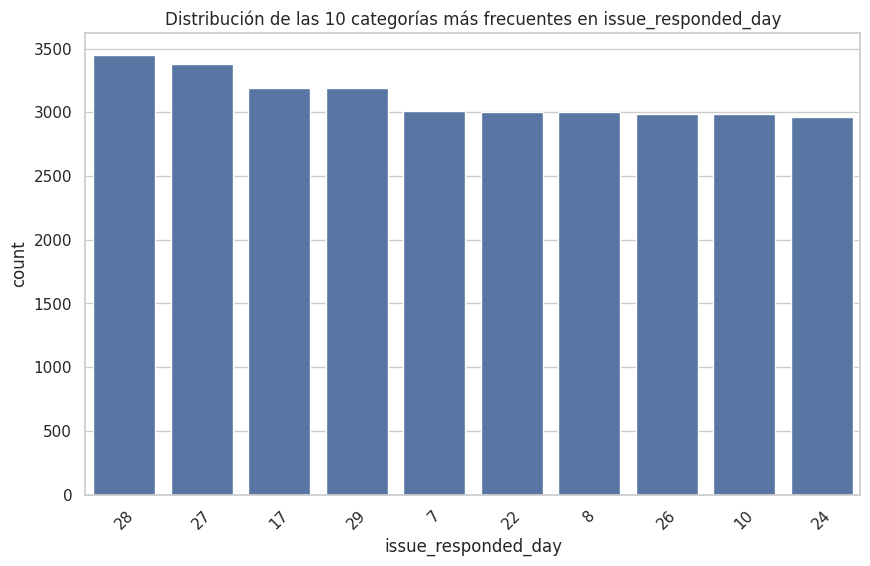

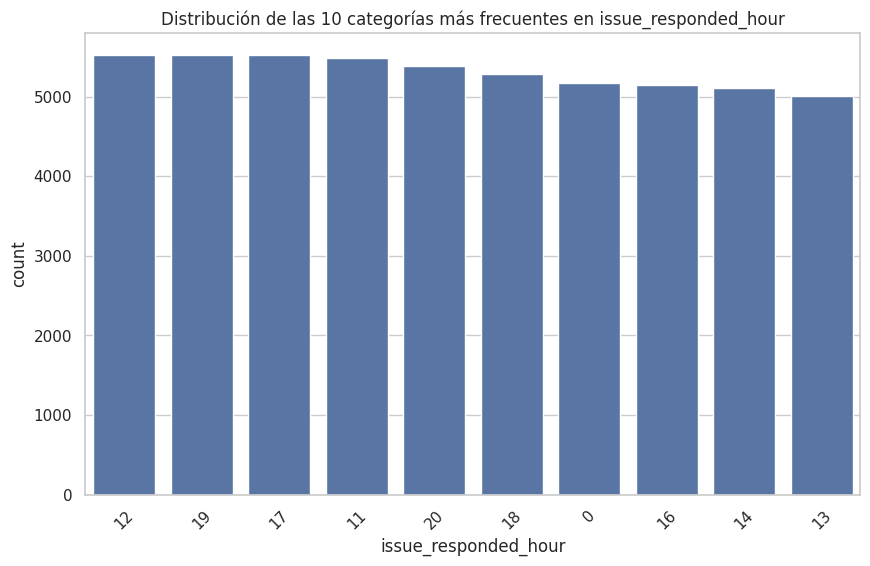

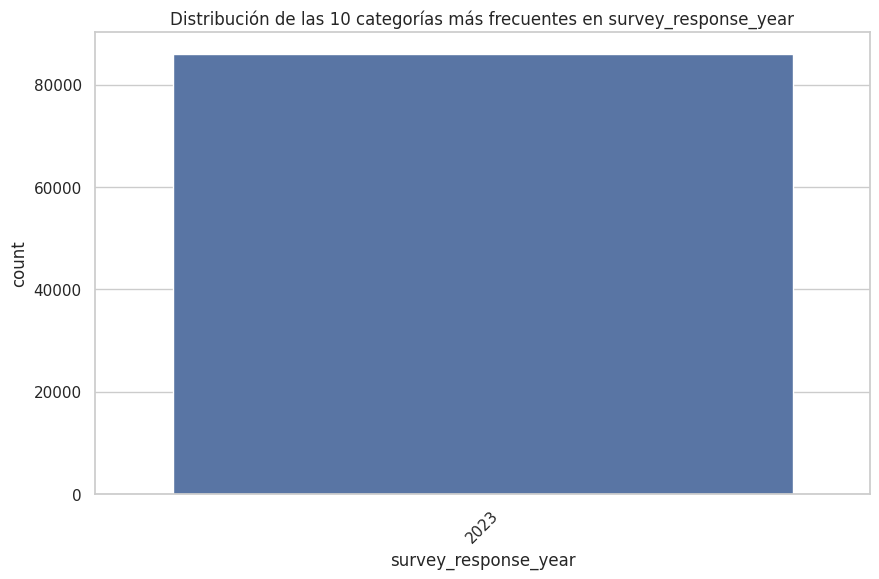

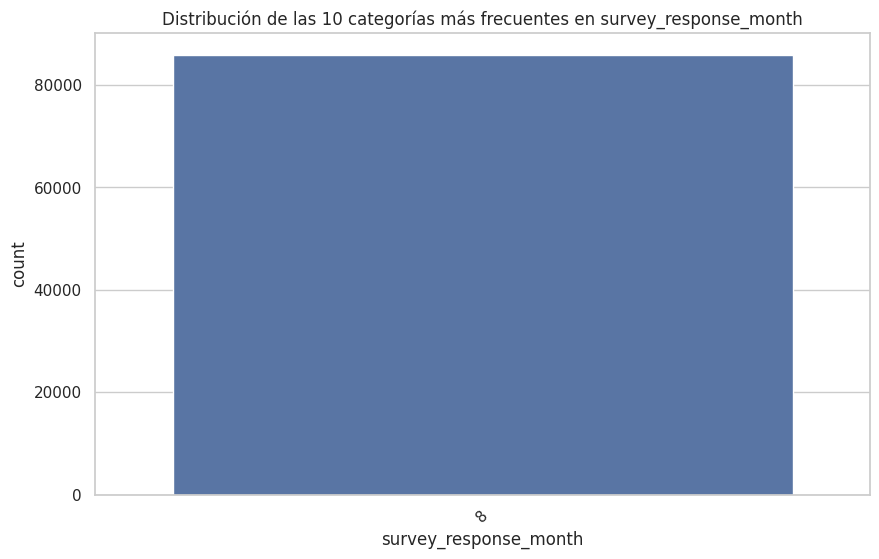

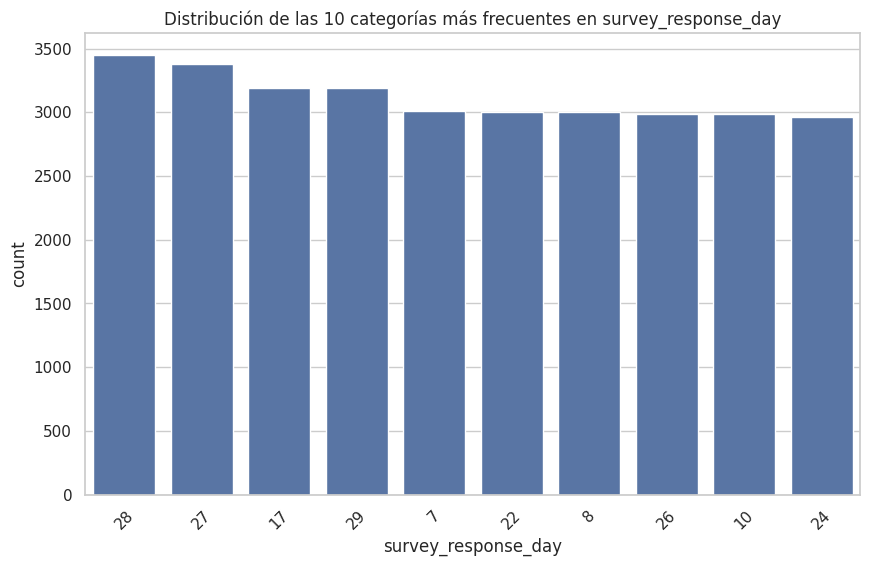

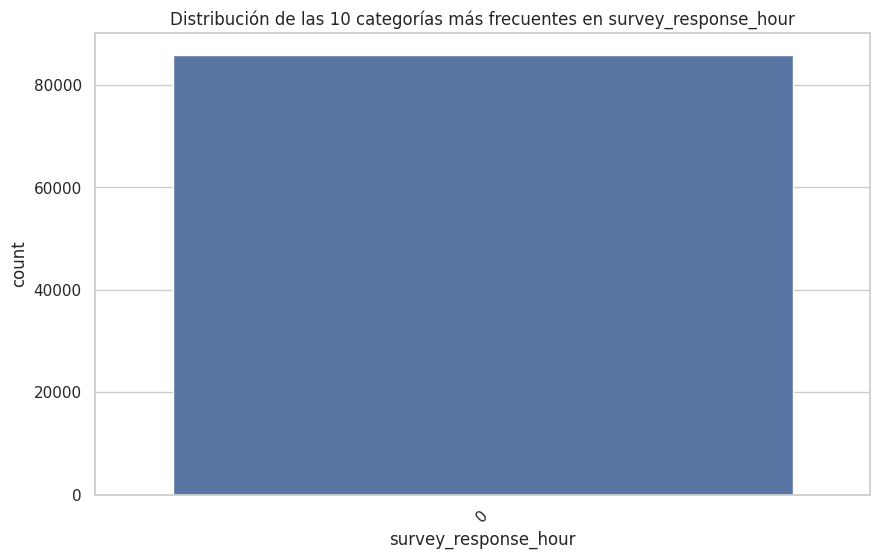

In [19]:
# Visualizar la distribución de categorías
for column in data.columns:
    plt.figure(figsize=(10, 6))
    # Obtener las 10 categorías más frecuentes
    top_10 = data[column].value_counts().nlargest(10).index
    # Filtrar el DataFrame para incluir solo estas categorías
    filtered_data = data[data[column].isin(top_10)]
    sns.countplot(x=column, data=filtered_data, order=top_10)
    plt.title(f'Distribución de las 10 categorías más frecuentes en {column}')
    plt.xticks(rotation=45)
    plt.show()


## Análisis univariado numéricas

In [20]:
### Cuales son las variables numéricas
numerical_columns = data.select_dtypes(exclude='object').columns
numerical_columns

Index(['CSAT Score', 'issue_reported_year', 'issue_reported_month',
       'issue_reported_day', 'issue_reported_hour', 'issue_responded_year',
       'issue_responded_month', 'issue_responded_day', 'issue_responded_hour',
       'survey_response_year', 'survey_response_month', 'survey_response_day',
       'survey_response_hour'],
      dtype='object')

In [21]:
data.describe()

,CSAT Score,issue_reported_year,issue_reported_month,issue_reported_day,issue_reported_hour,issue_responded_year,issue_responded_month,issue_responded_day,issue_responded_hour,survey_response_year,survey_response_month,survey_response_day,survey_response_hour
count,85907.000000,85907.0,85907.000000,85907.000000,85907.000000,85907.0,85907.0,85907.000000,85907.000000,85907.0,85907.0,85907.000000,85907.0
mean,4.242157,2023.0,7.997067,16.399630,14.583177,2023.0,8.0,16.429534,13.985123,2023.0,8.0,16.429534,0.0
std,1.378903,0.0,0.054082,8.822338,5.002535,0.0,0.0,8.825986,5.855840,0.0,0.0,8.825986,0.0
min,1.000000,2023.0,7.000000,1.000000,0.000000,2023.0,8.0,1.000000,0.000000,2023.0,8.0,1.000000,0.0
25%,4.000000,2023.0,8.000000,9.000000,11.000000,2023.0,8.0,9.000000,10.000000,2023.0,8.0,9.000000,0.0
50%,5.000000,2023.0,8.000000,16.000000,15.000000,2023.0,8.0,16.000000,15.000000,2023.0,8.0,16.000000,0.0
75%,5.000000,2023.0,8.000000,24.000000,19.000000,2023.0,8.0,24.000000,19.000000,2023.0,8.0,24.000000,0.0
max,5.000000,2023.0,8.000000,31.000000,23.000000,2023.0,8.0,31.000000,23.000000,2023.0,8.0,31.000000,0.0


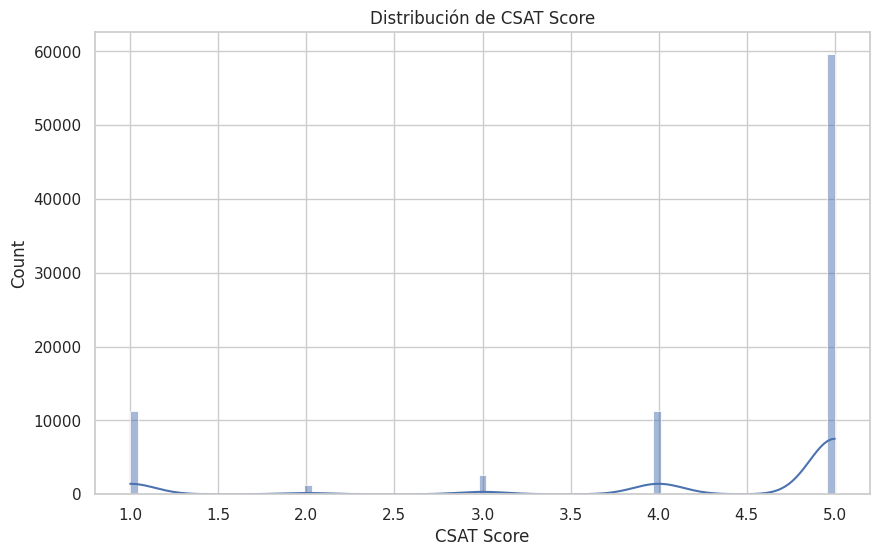

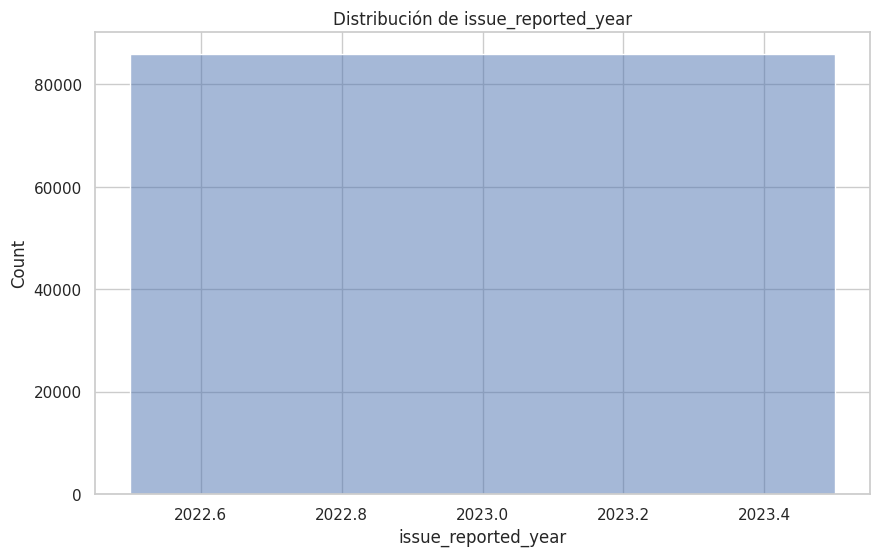

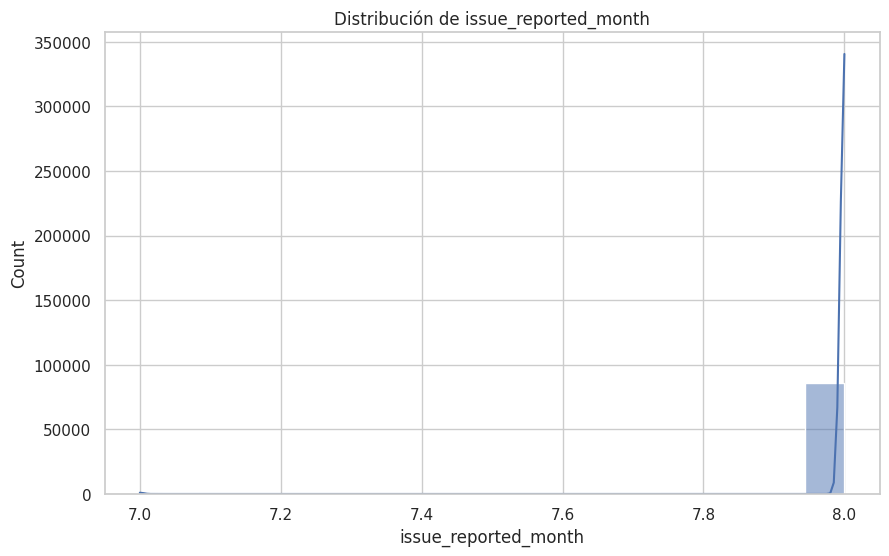

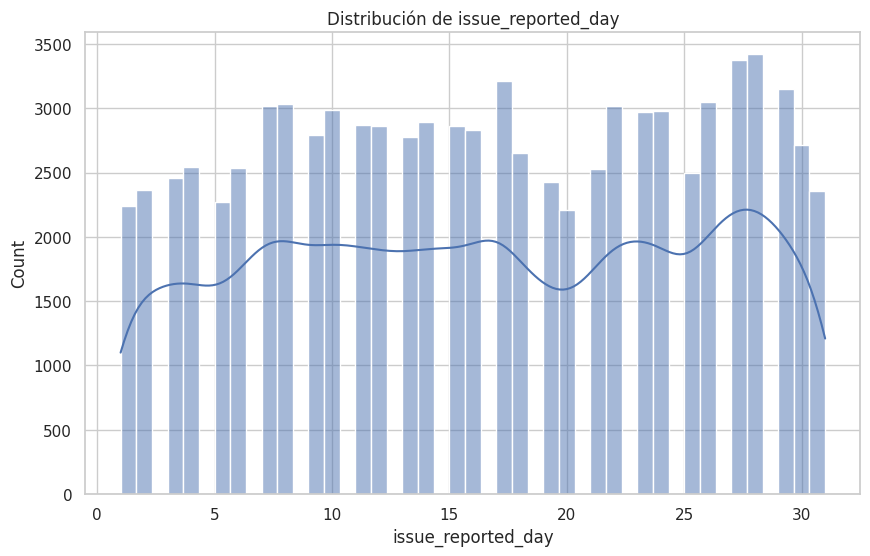

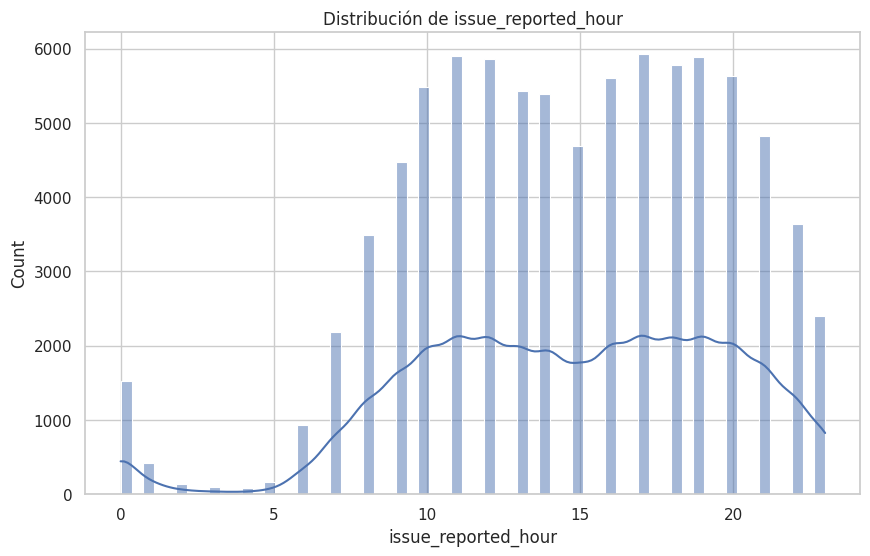

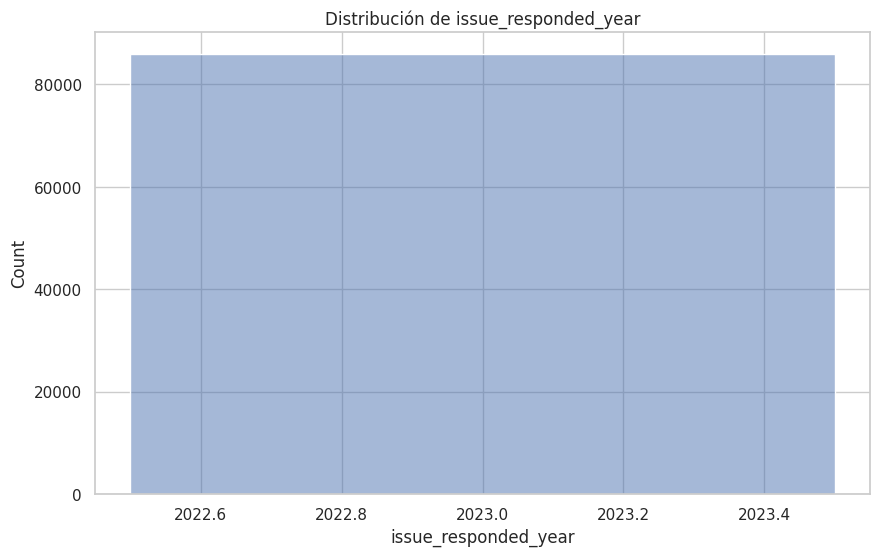

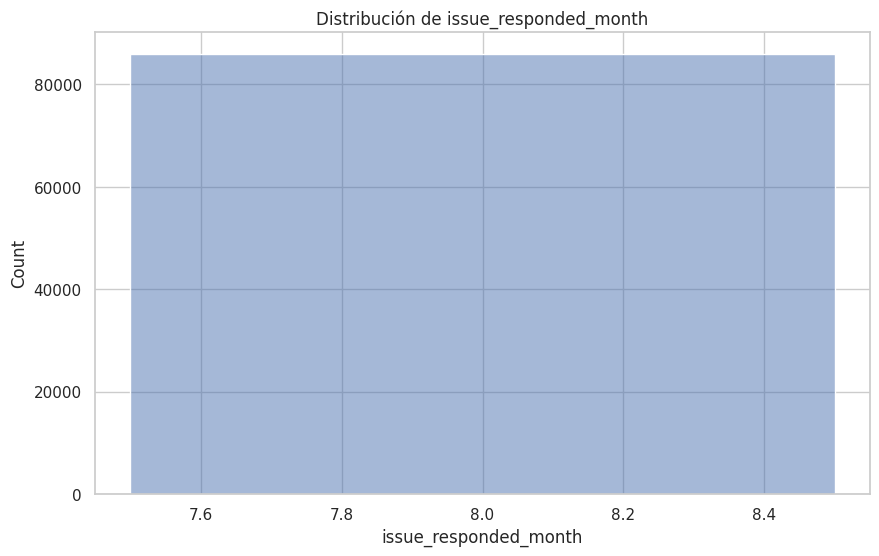

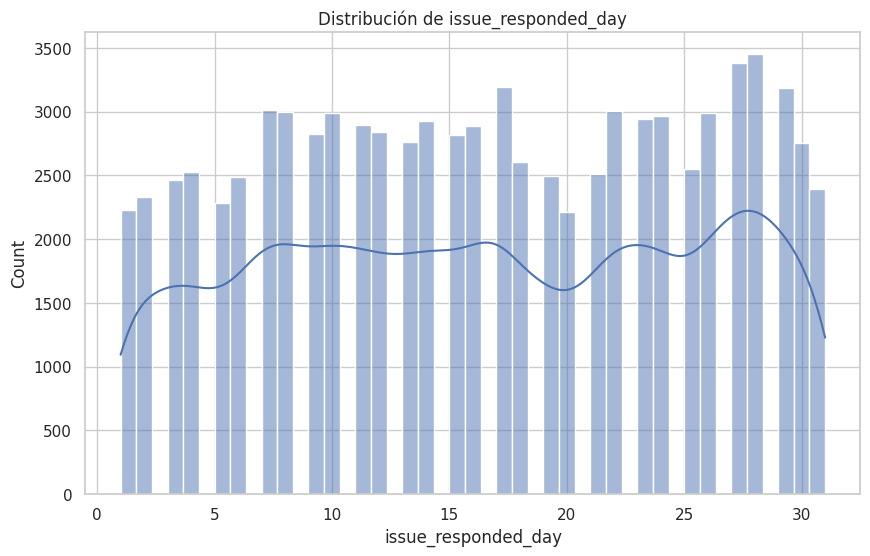

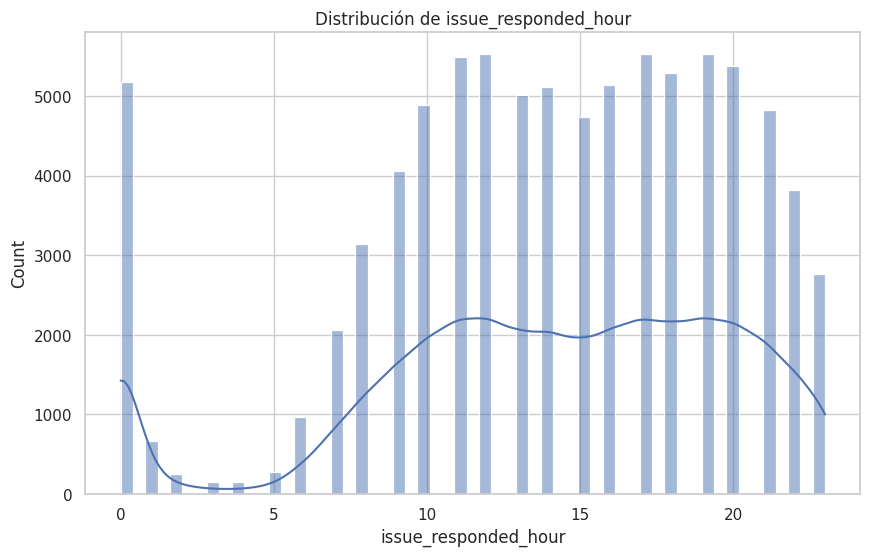

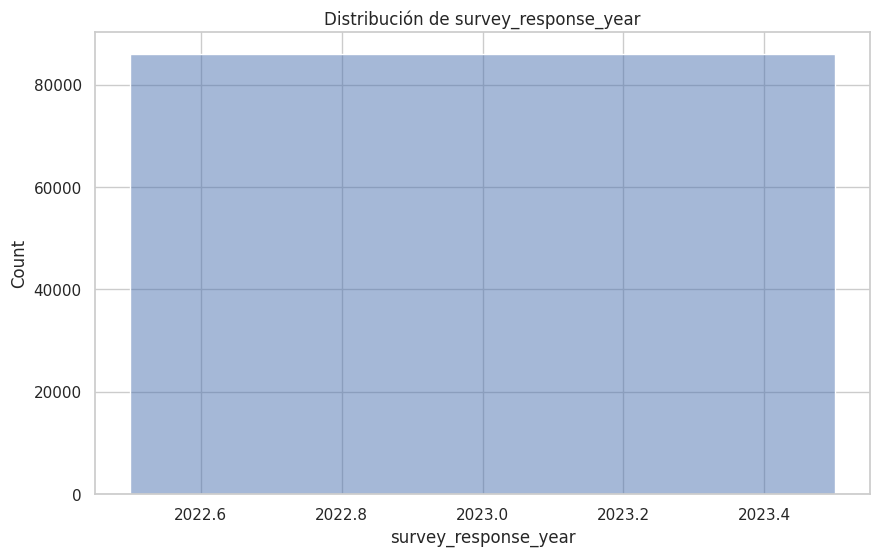

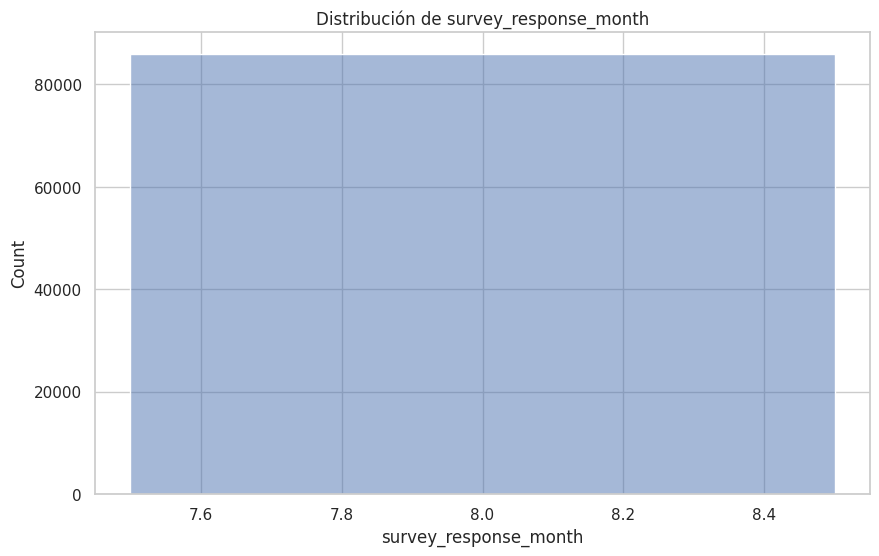

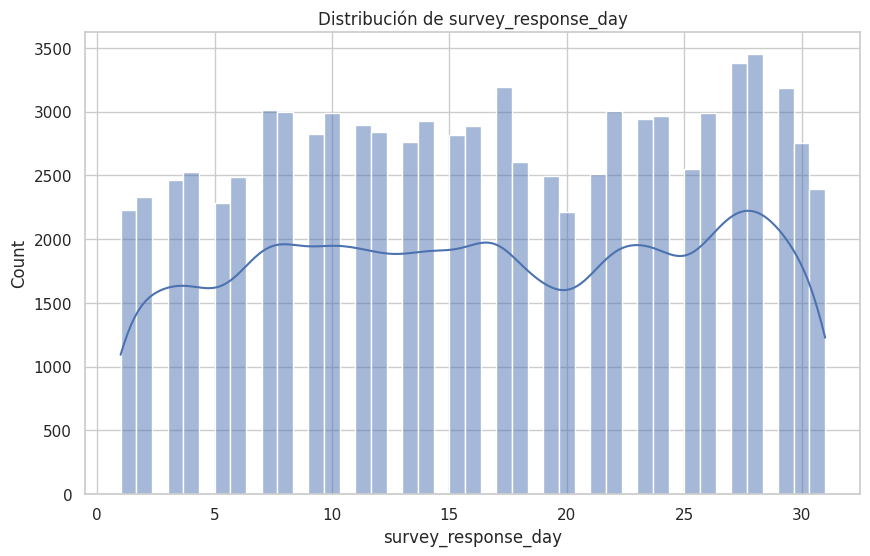

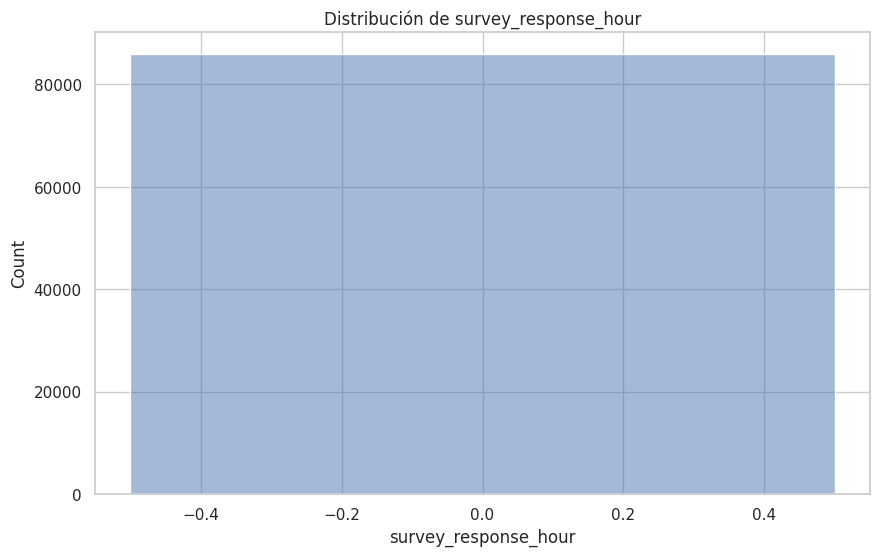

In [22]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

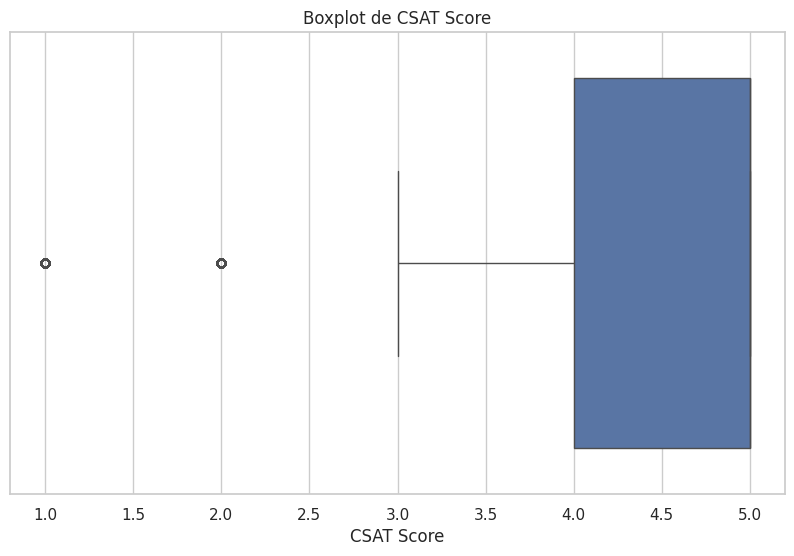

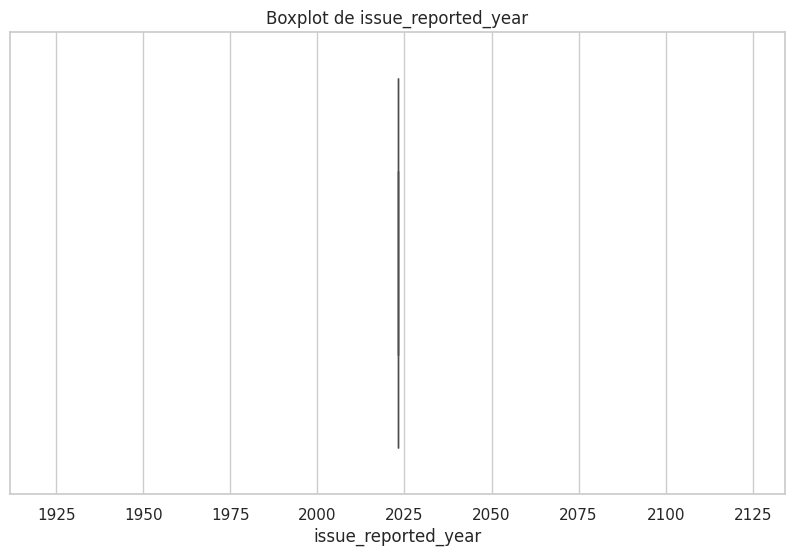

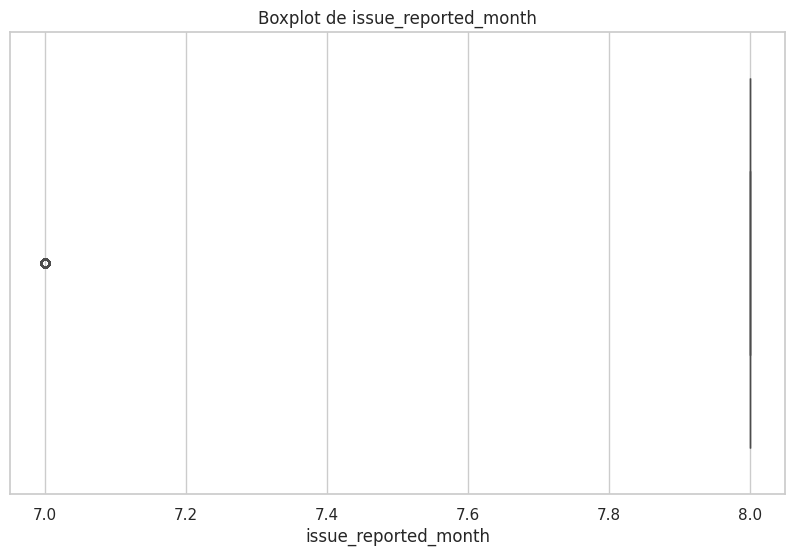

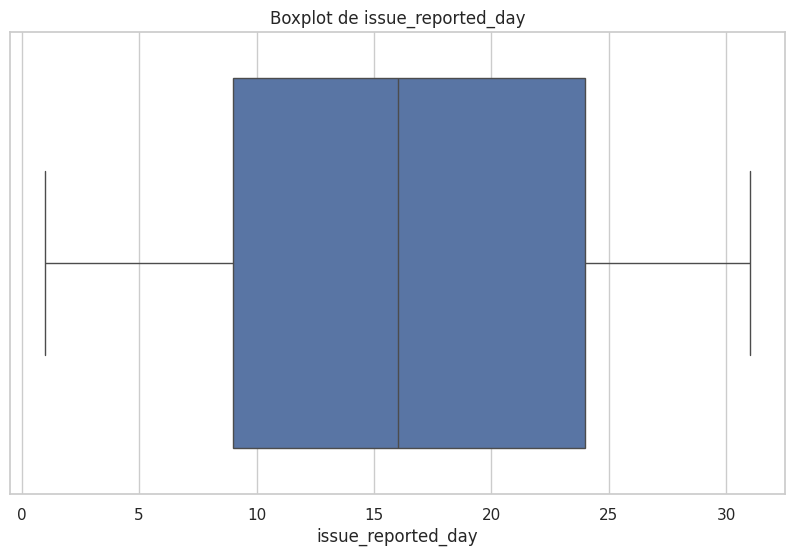

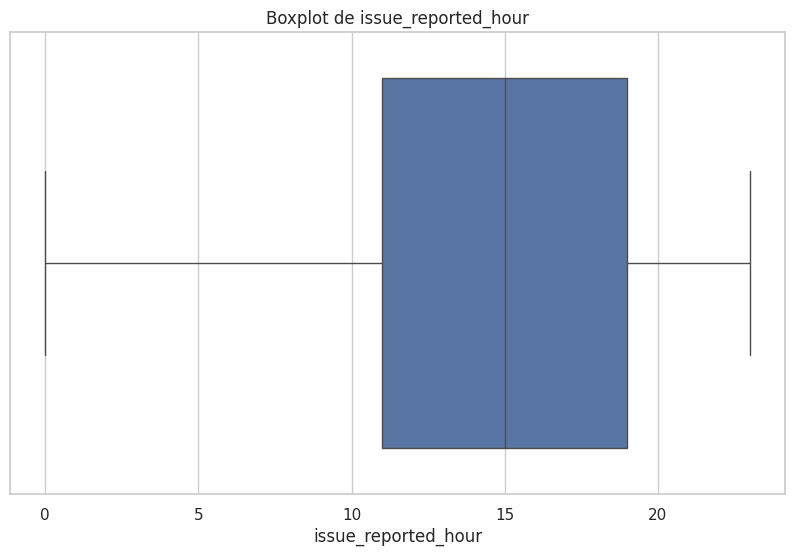

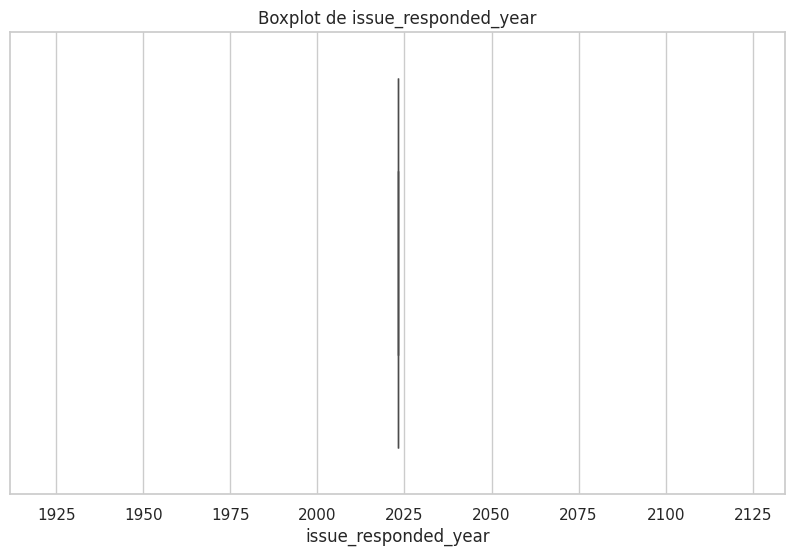

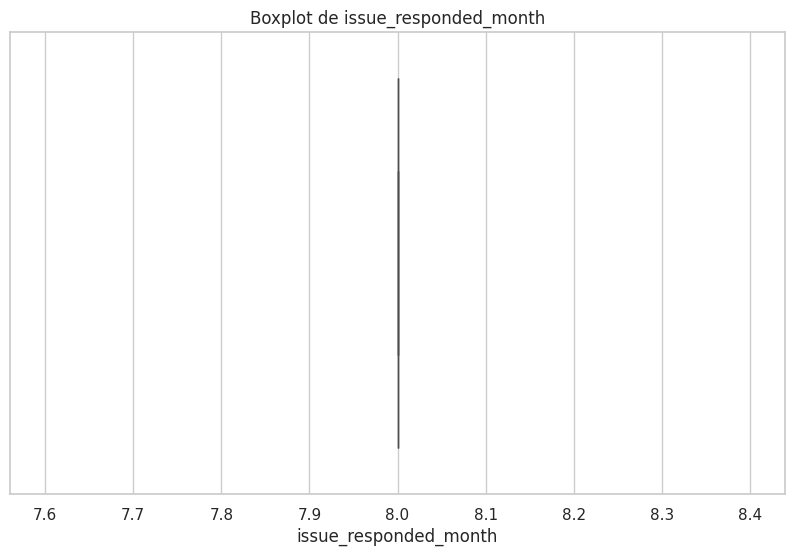

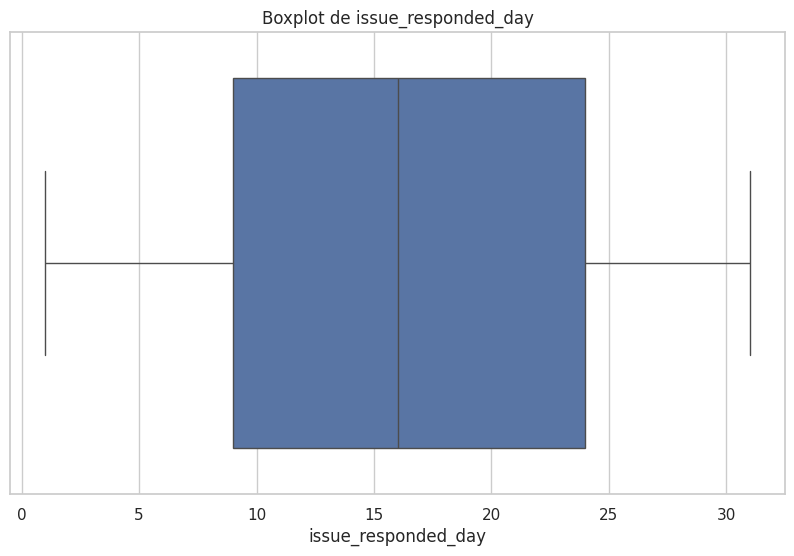

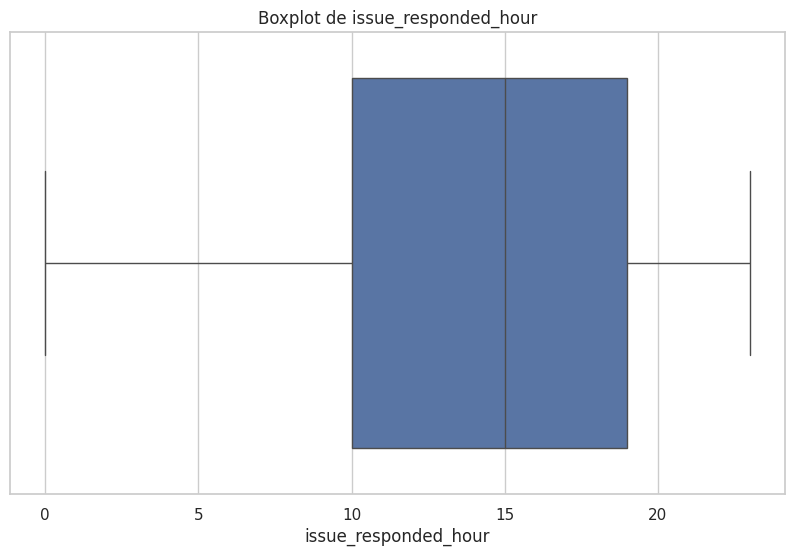

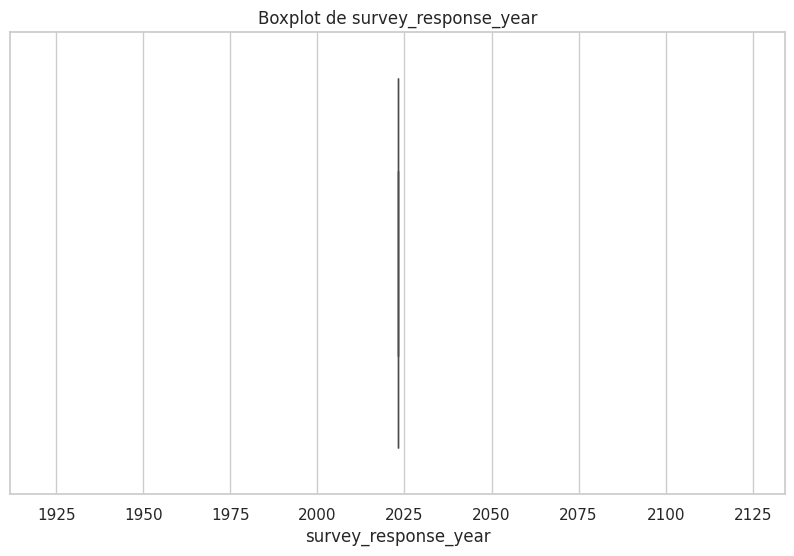

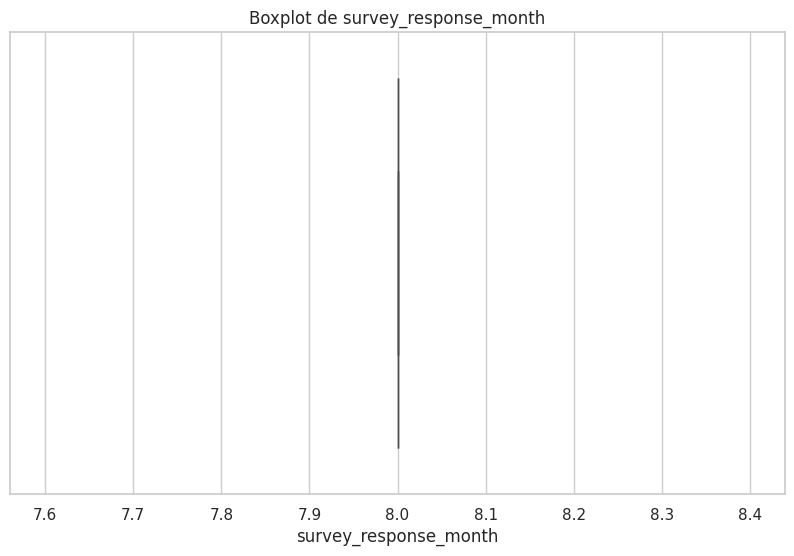

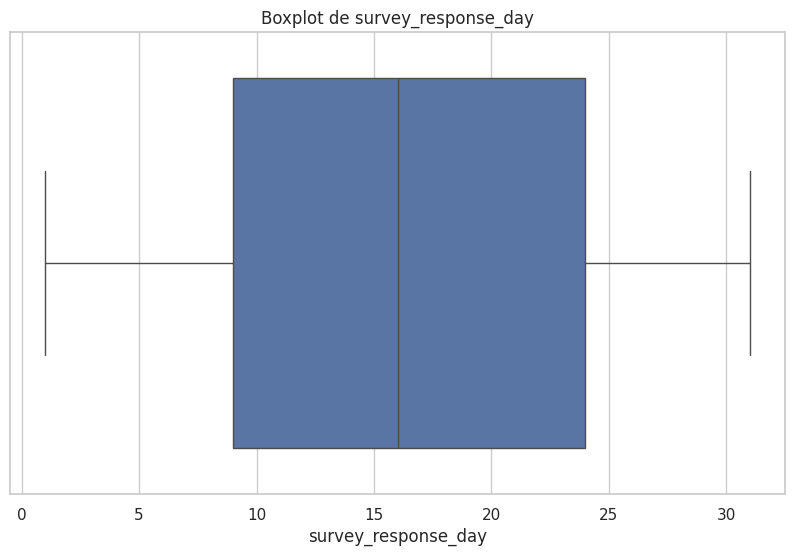

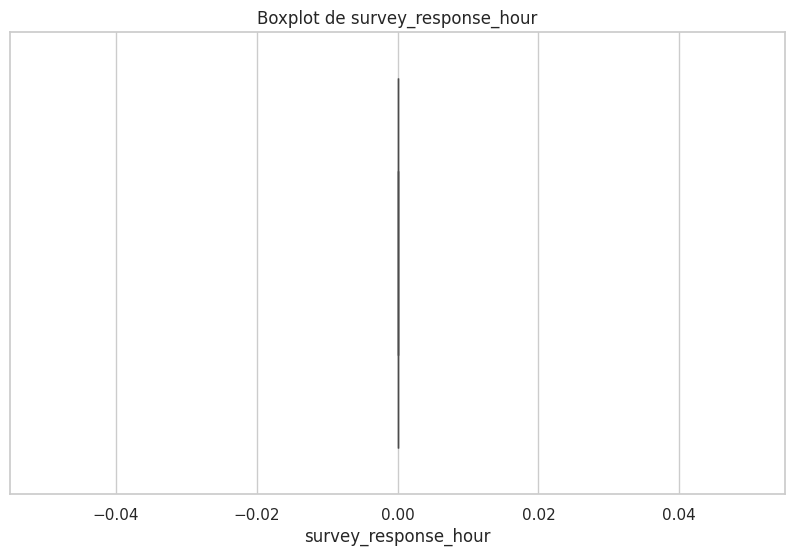

In [23]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

Para este conjunto de muestra no se registran outliers para las variables numéricas 

## Análisis Bivariado

In [24]:
data.columns

Index(['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'issue_reported_year', 'issue_reported_month', 'issue_reported_day',
       'issue_reported_hour', 'issue_responded_year', 'issue_responded_month',
       'issue_responded_day', 'issue_responded_hour', 'survey_response_year',
       'survey_response_month', 'survey_response_day', 'survey_response_hour'],
      dtype='object')

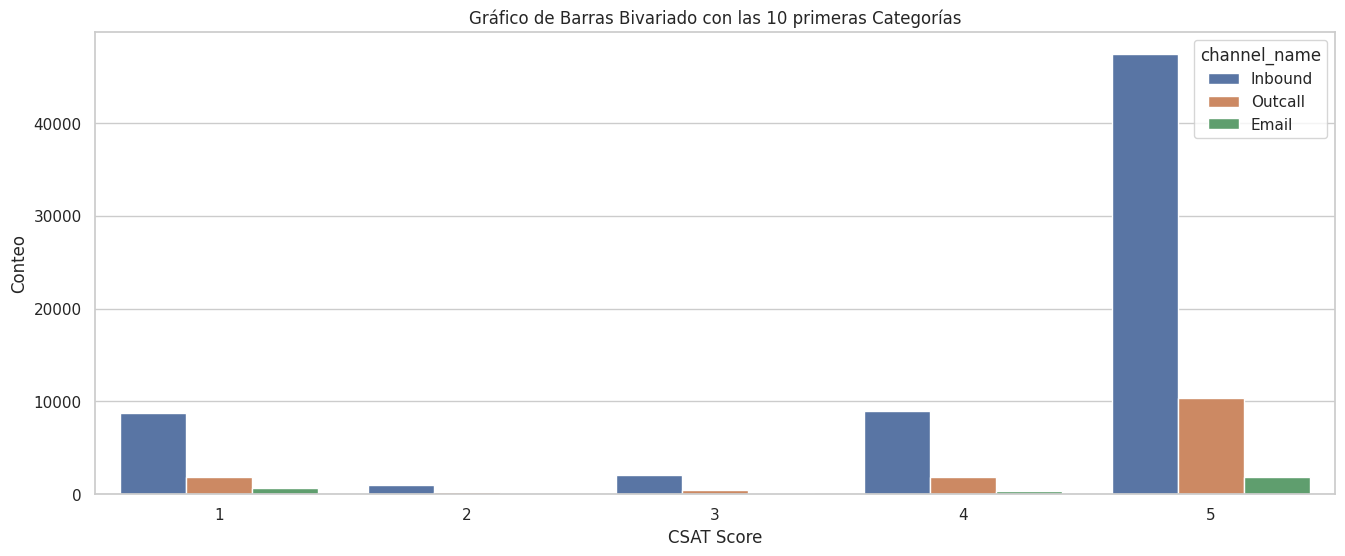

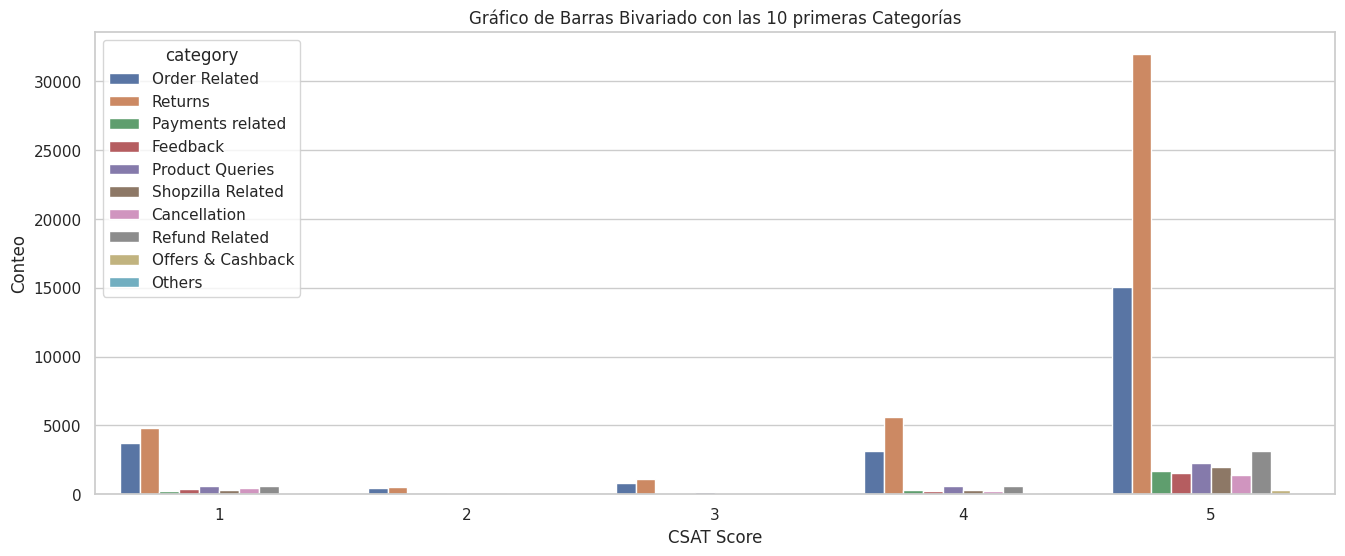

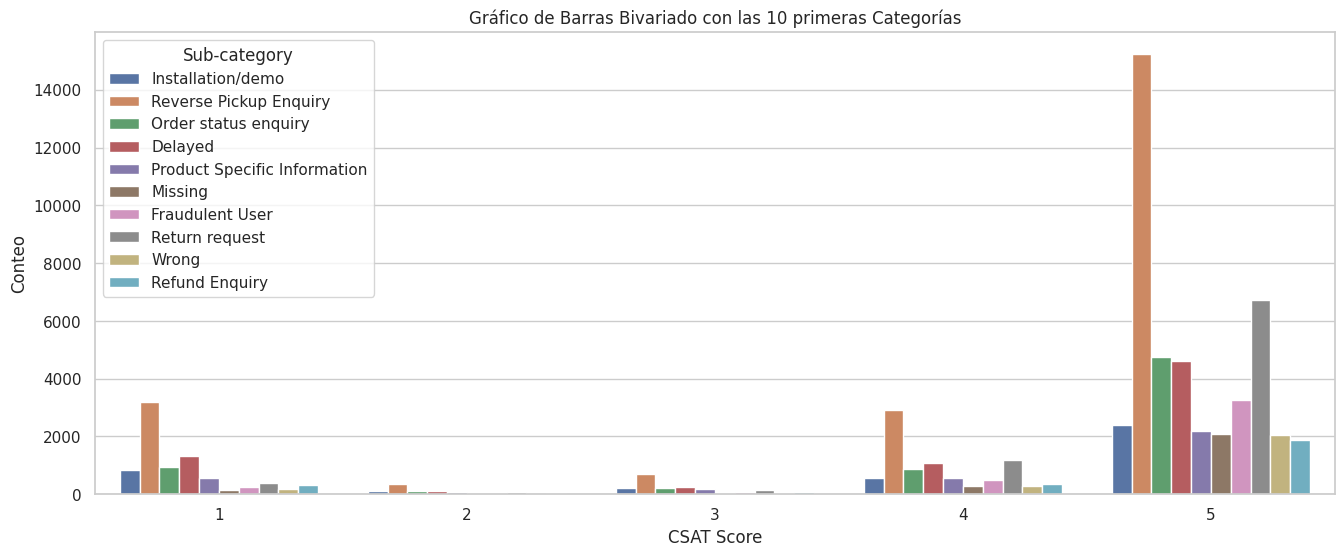

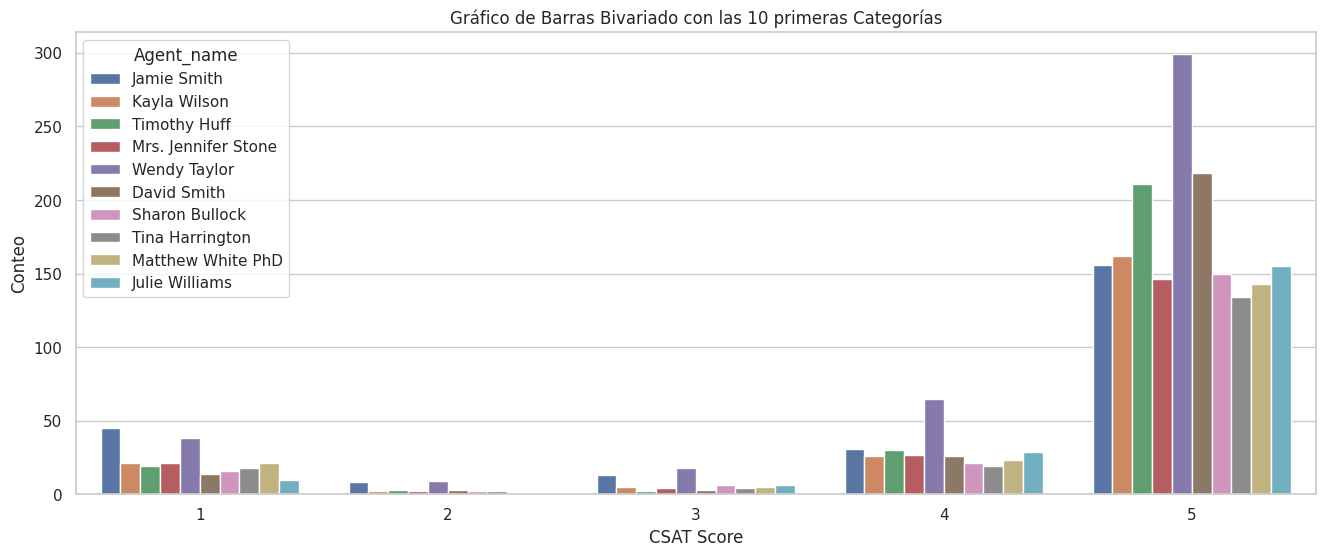

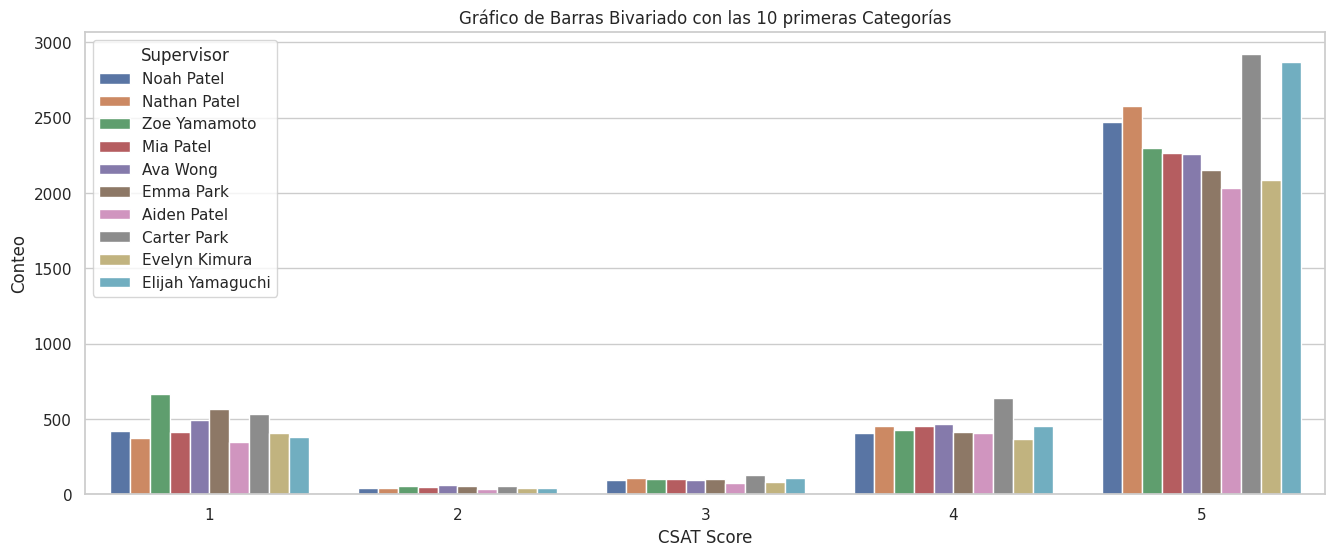

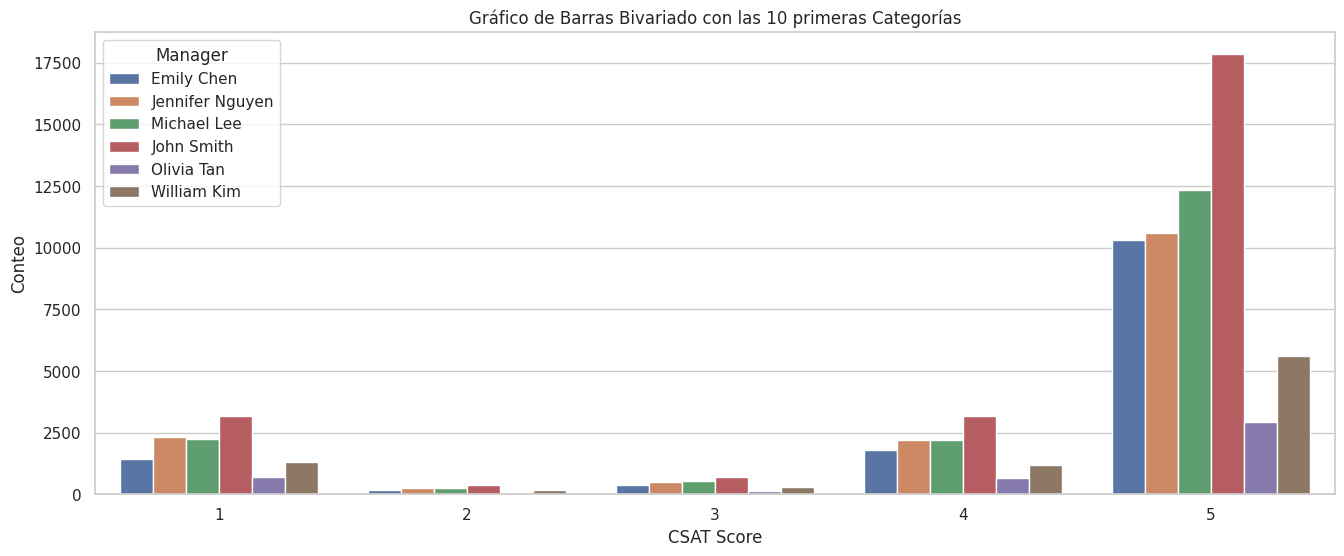

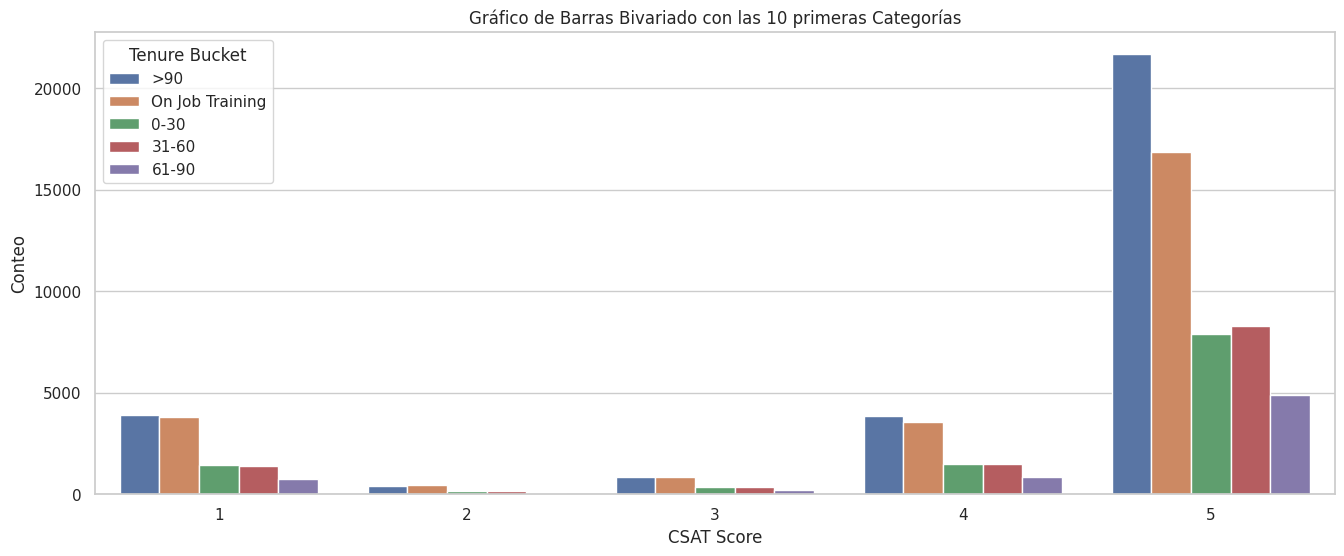

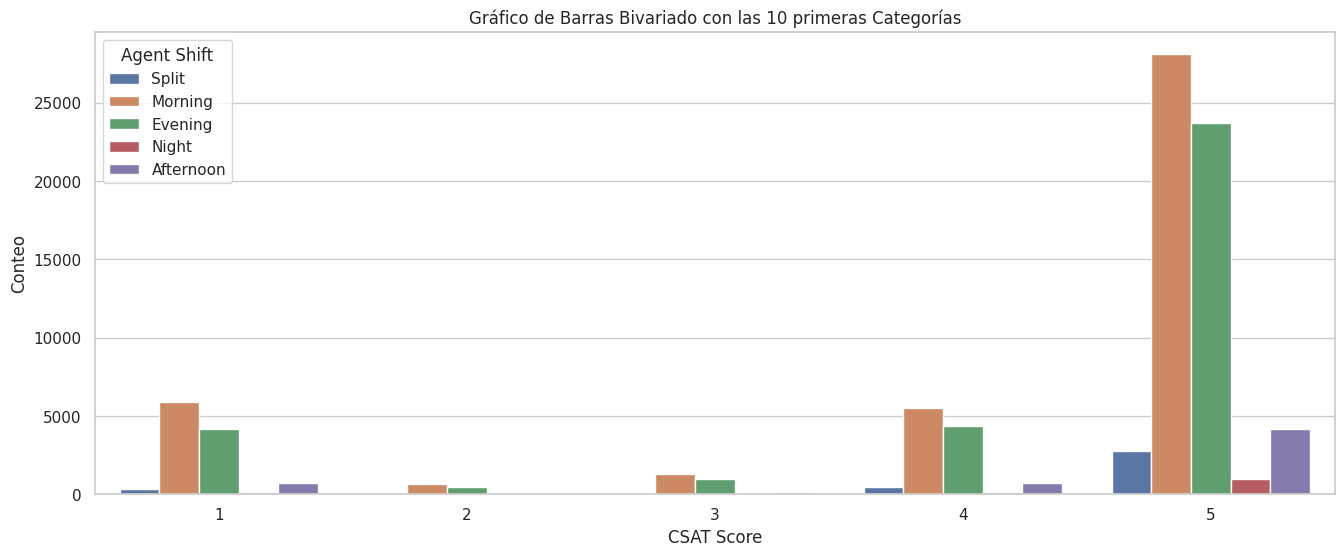

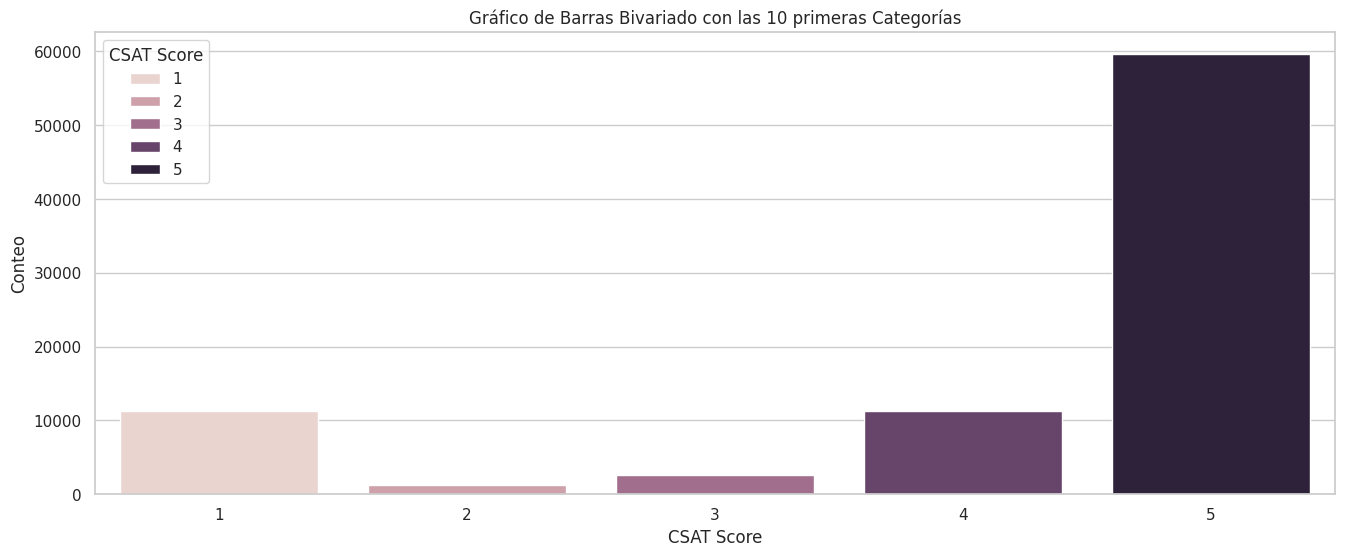

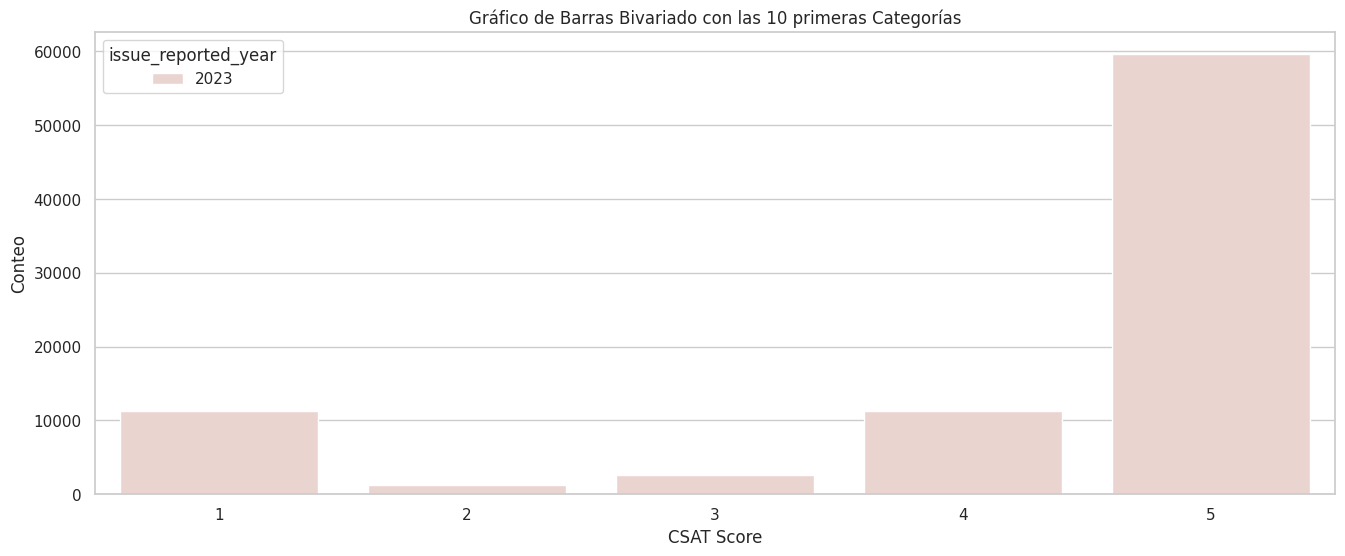

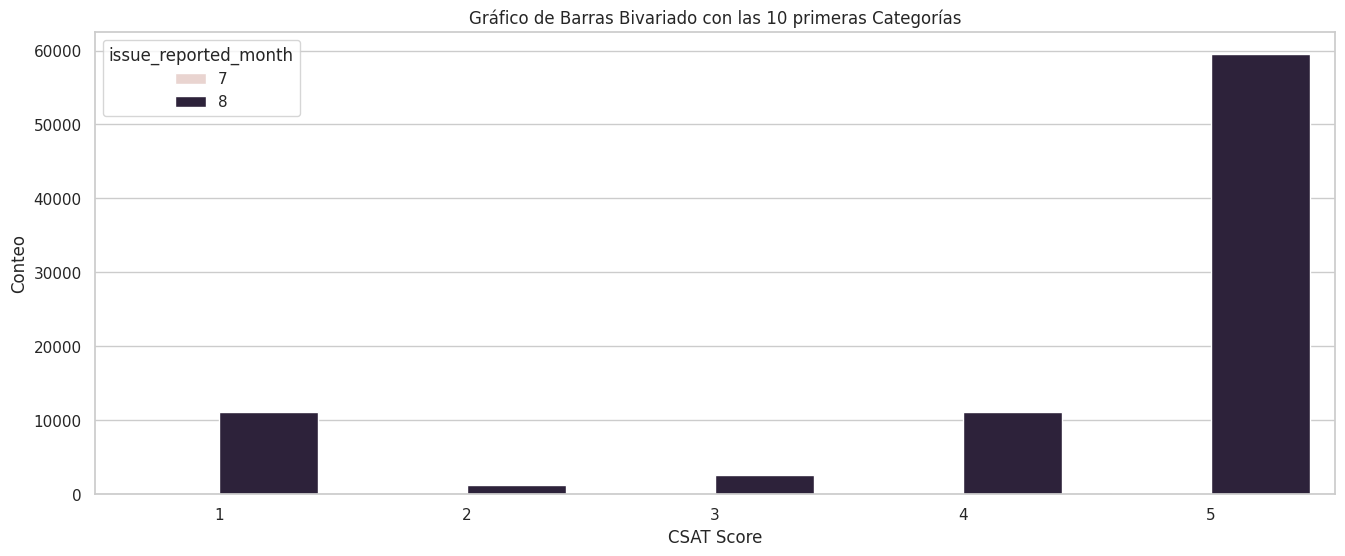

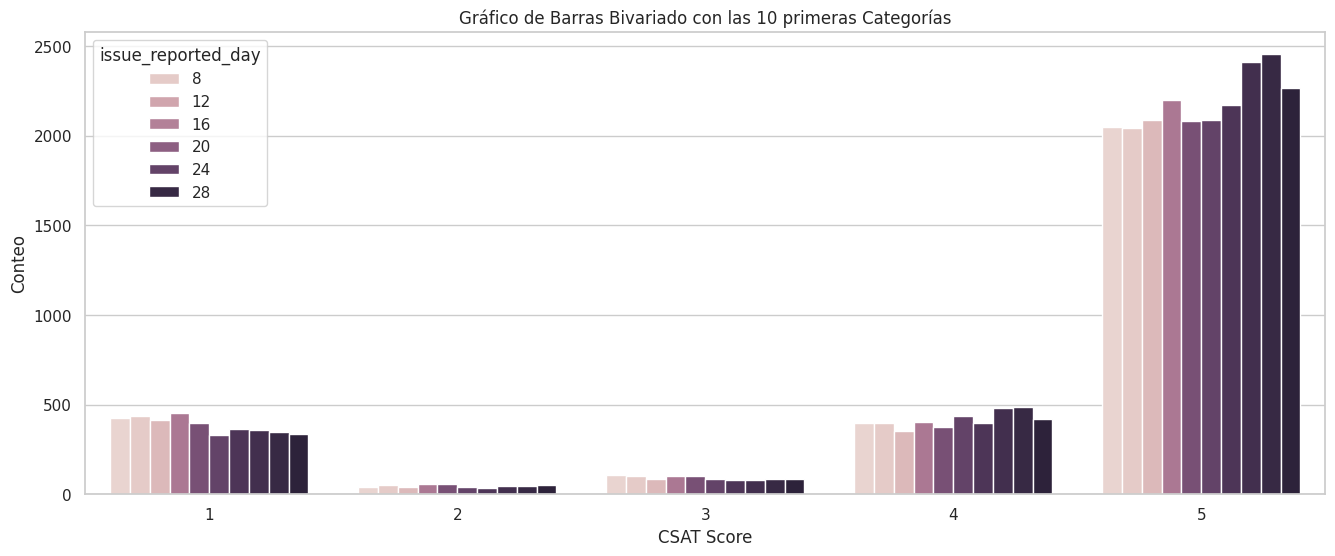

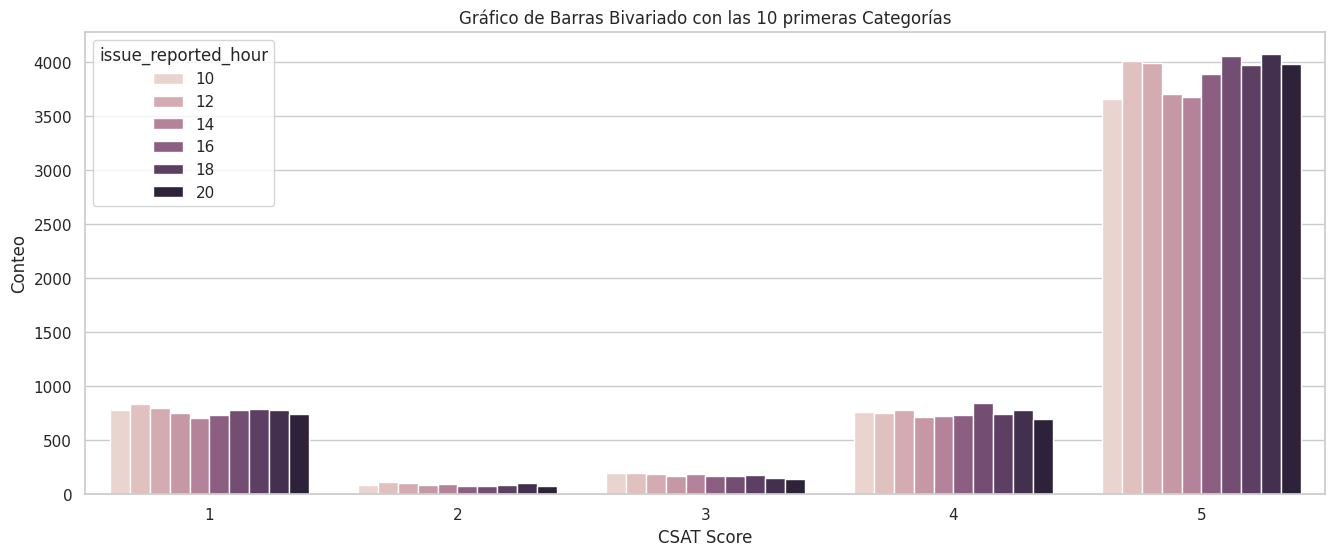

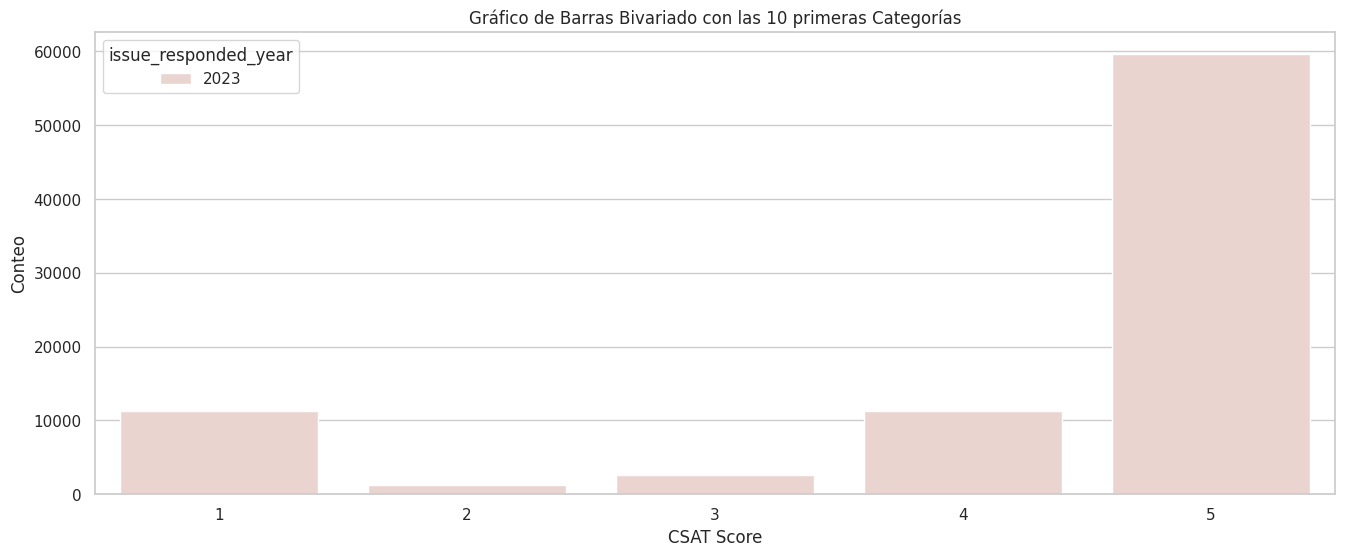

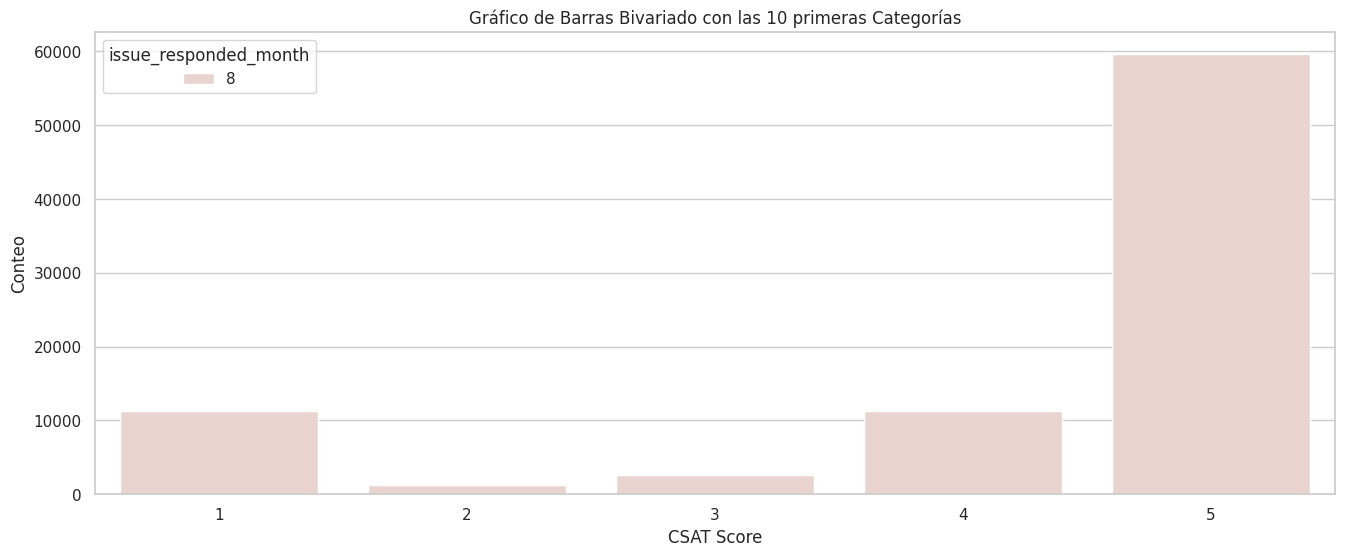

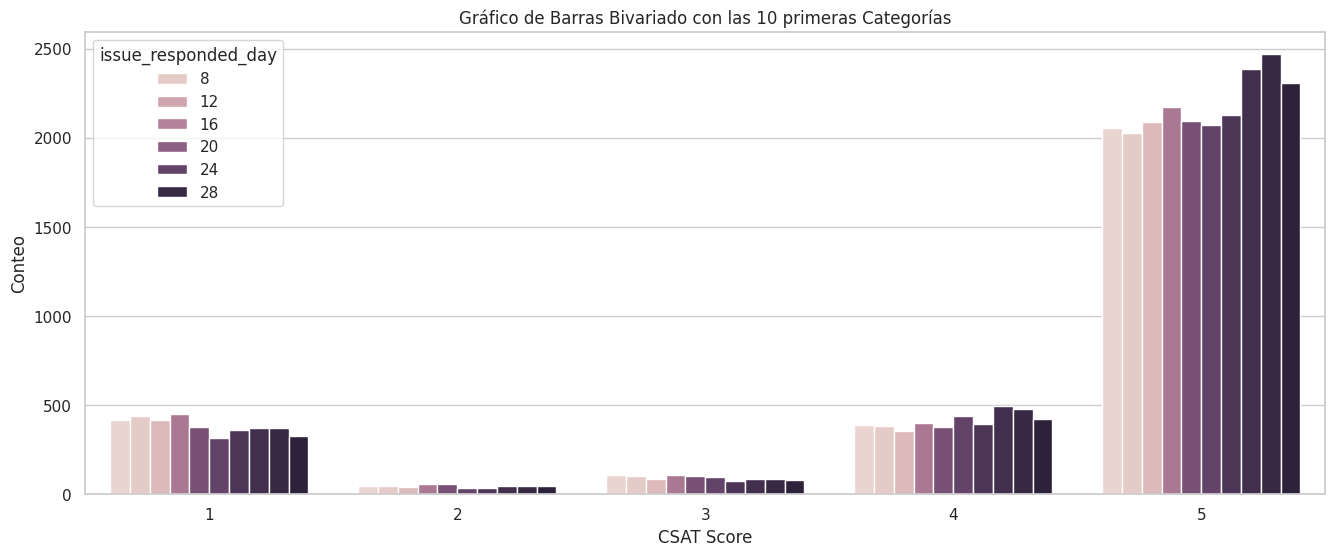

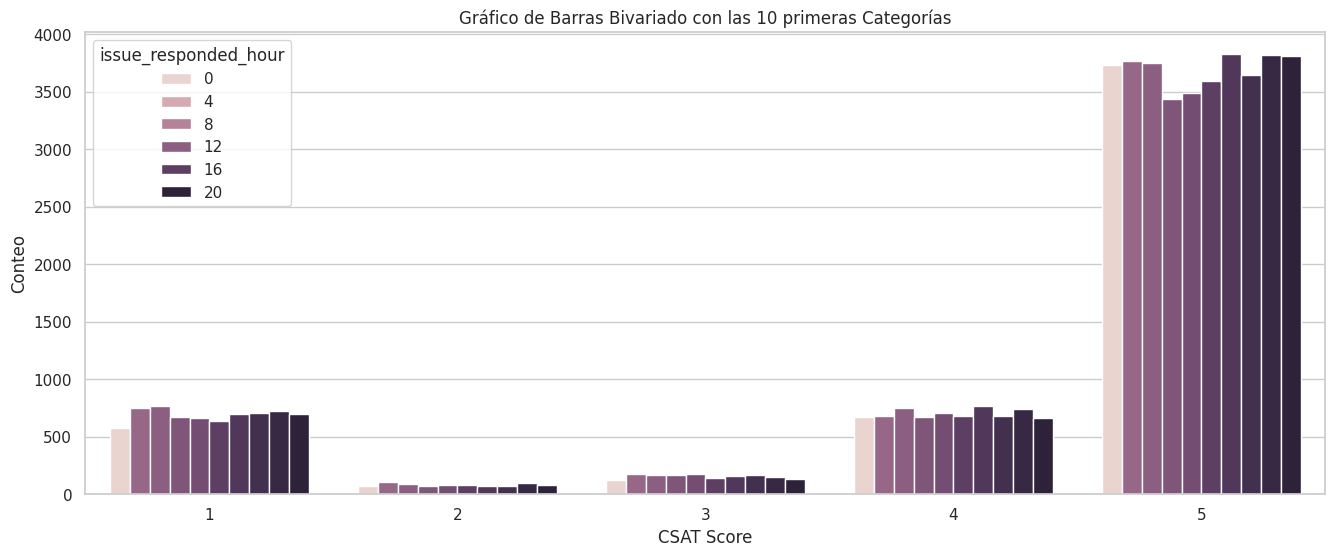

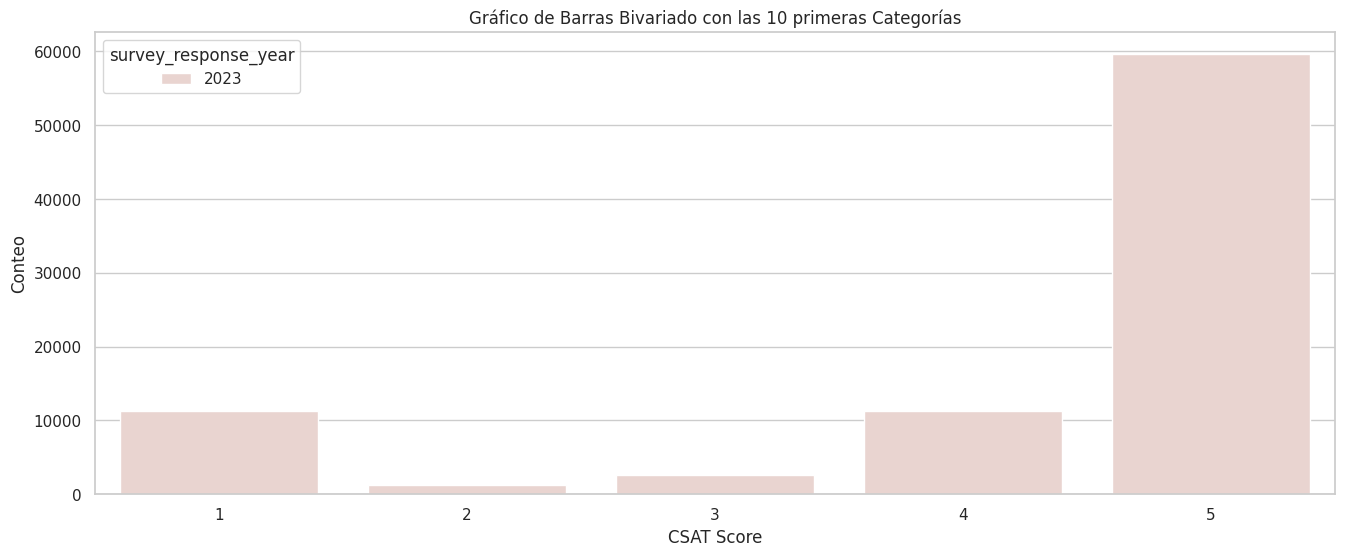

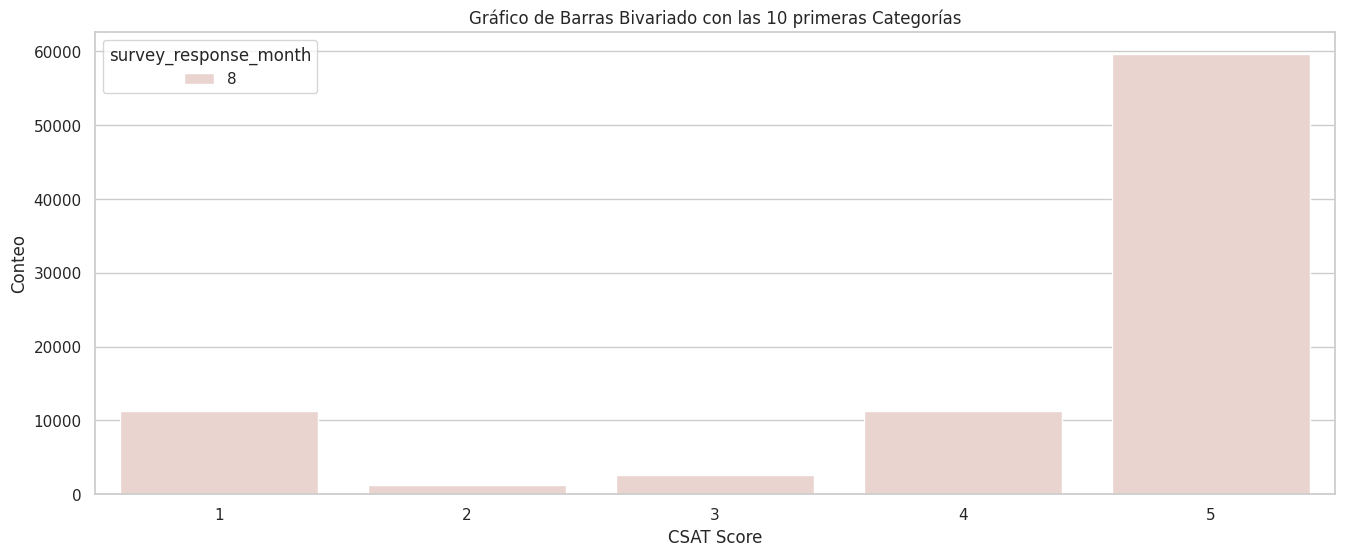

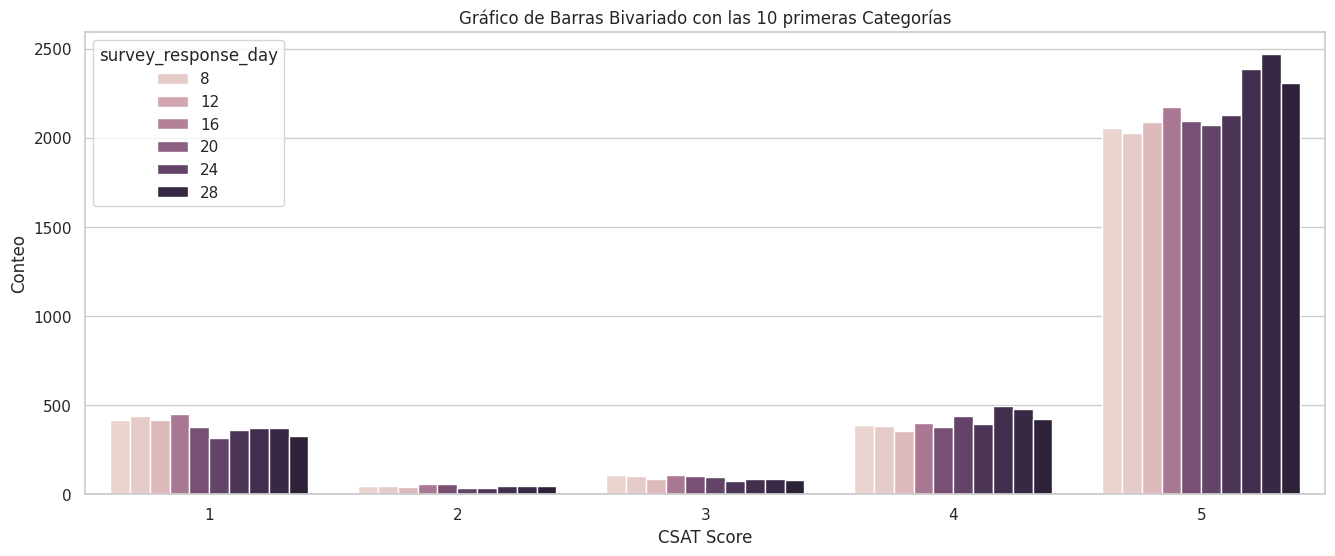

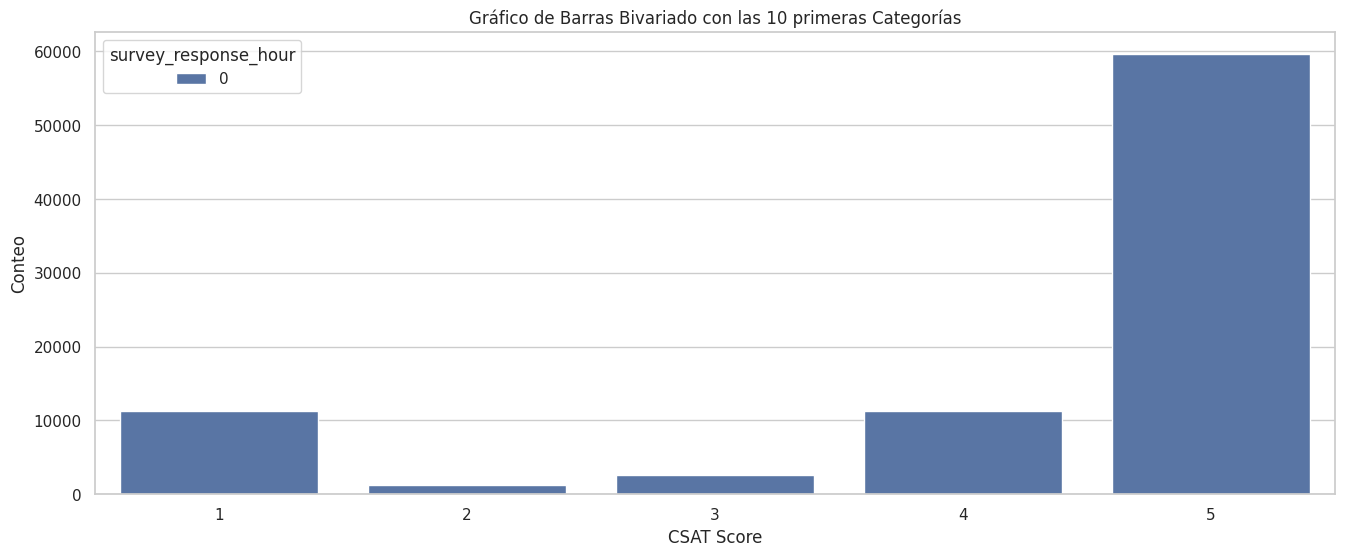

In [25]:
for column in data.columns:
    top_10_categories = data[column].value_counts().nlargest(10).index
    # Filtrar los datos para incluir solo las 10 primeras categorías
    filtered_data = data[data[column].isin(top_10_categories)]
    # Graficar un gráfico de barras bivariado con las 10 primeras categorías
    plt.figure(figsize=(16, 6))
    sns.countplot(data=filtered_data, x='CSAT Score', hue=column)
    plt.title('Gráfico de Barras Bivariado con las 10 primeras Categorías')
    plt.xlabel('CSAT Score')
    plt.ylabel('Conteo')
    plt.legend(title=column)
    plt.show()

### Csat Score respeto de Channel name


In [26]:
percentage_per_category = data.groupby('CSAT Score')['channel_name'].count() / data.shape[0] * 100

# Imprimir el resultado
print(percentage_per_category.round(2))

CSAT Score
1    13.07
2     1.49
3     2.98
4    13.06
5    69.40
Name: channel_name, dtype: float64


Se puede observar que hay un alto nivel de satisfacción entre los clientes, con casi un 70% de ellos expresando satisfacción. Por otro lado, solo un 13% muestra un nivel más bajo de satisfacción

In [27]:
# Calcular el porcentaje de ocurrencia de cada categoría en 'channel_name' para cada valor único de 'CSAT Score'
percentage_distribution = data.groupby('CSAT Score')['channel_name'].value_counts(normalize=True) * 100

# Asignar nombres a las columnas
percentage_distribution = percentage_distribution.rename('percentage')

# Imprimir el resultado
print(percentage_distribution)

CSAT Score  channel_name
1           Inbound         77.871772
            Outcall         16.464826
            Email            5.663402
2           Inbound         78.799688
            Outcall         16.212003
            Email            4.988309
3           Inbound         79.476153
            Outcall         16.536357
            Email            3.987490
4           Inbound         79.632766
            Outcall         16.908815
            Email            3.458419
5           Inbound         79.539393
            Outcall         17.385981
            Email            3.074626
Name: percentage, dtype: float64


In [28]:
pivot_table = percentage_distribution.reset_index().pivot(index='CSAT Score', columns='channel_name', values='percentage')

# Imprimir el DataFrame pivotado
print(pivot_table)

channel_name     Email    Inbound    Outcall
CSAT Score                                  
1             5.663402  77.871772  16.464826
2             4.988309  78.799688  16.212003
3             3.987490  79.476153  16.536357
4             3.458419  79.632766  16.908815
5             3.074626  79.539393  17.385981


 Los niveles de satisfacción tienen el mismo porcentaje para cada canal, sugiere que los clientes utilizan los mismos canales para expresar su satisfacción, independientemente del nivel de satisfacción en sí.
 

### Csat Score respeto de category

### Categorías de la interacción en el contexto de satisfacción al cliente

1. **Returns**: Relacionado con la devolución de productos.
2. **Refund Related**: Relacionado con solicitudes de reembolso.
3. **Offers & Cashback**: Relacionado con ofertas y programas de devolución de efectivo.
4. **Payments related**: Relacionado con consultas o problemas de pago.
5. **Cancellation**: Relacionado con cancelaciones de pedidos o servicios.
6. **Order Related**: Relacionado con consultas o problemas relacionados con el pedido.
7. **Shopzilla Related**: Relacionado con consultas o problemas relacionados con Shopzilla (podría ser una plataforma de compras).
8. **Feedback**: Relacionado con comentarios o retroalimentación sobre la experiencia del cliente.
9. **Product Queries**: Relacionado con consultas sobre productos.
10. **Others**: Otros tipos de consultas o interacciones no cubiertas por las categorías anteriores.
11. **App/website**: Relacionado con consultas o problemas relacionados con la aplicación móvil o el sitio web de la empresa.
12. **Onboarding related**: Relacionado con consultas o problemas relacionados con el proceso de incorporación o registro.


In [29]:
# Calcular el porcentaje de ocurrencia de cada categoría en 'category' para cada valor único de 'CSAT Score'
percentage_distribution = data.groupby('CSAT Score')['category'].value_counts(normalize=True) * 100

# Asignar nombres a las columnas
percentage_distribution = percentage_distribution.rename('percentage')

# Imprimir el resultado
percentage_distribution


CSAT Score  category          
1           Returns               42.956367
            Order Related         33.214604
            Refund Related         5.503117
            Product Queries        5.191451
            Cancellation           3.873553
            Feedback               3.125557
            Shopzilla Related      2.965272
            Payments related       2.119323
            Offers & Cashback      0.614426
            Others                 0.258237
            App/website            0.097952
            Onboarding related     0.080142
2           Returns               42.790335
            Order Related         32.891660
            Product Queries        7.092751
            Refund Related         5.066251
            Cancellation           3.117693
            Shopzilla Related      3.039751
            Feedback               2.727981
            Payments related       2.727981
            Others                 0.311769
            Offers & Cashback      0.155885
 

    CSAT Score            category  percentage
0            1             Returns   42.956367
1            1       Order Related   33.214604
2            1      Refund Related    5.503117
3            1     Product Queries    5.191451
4            1        Cancellation    3.873553
5            1            Feedback    3.125557
6            1   Shopzilla Related    2.965272
7            1    Payments related    2.119323
8            1   Offers & Cashback    0.614426
9            1              Others    0.258237
10           1         App/website    0.097952
11           1  Onboarding related    0.080142
12           2             Returns   42.790335
13           2       Order Related   32.891660
14           2     Product Queries    7.092751
15           2      Refund Related    5.066251
16           2        Cancellation    3.117693
17           2   Shopzilla Related    3.039751
18           2            Feedback    2.727981
19           2    Payments related    2.727981
20           

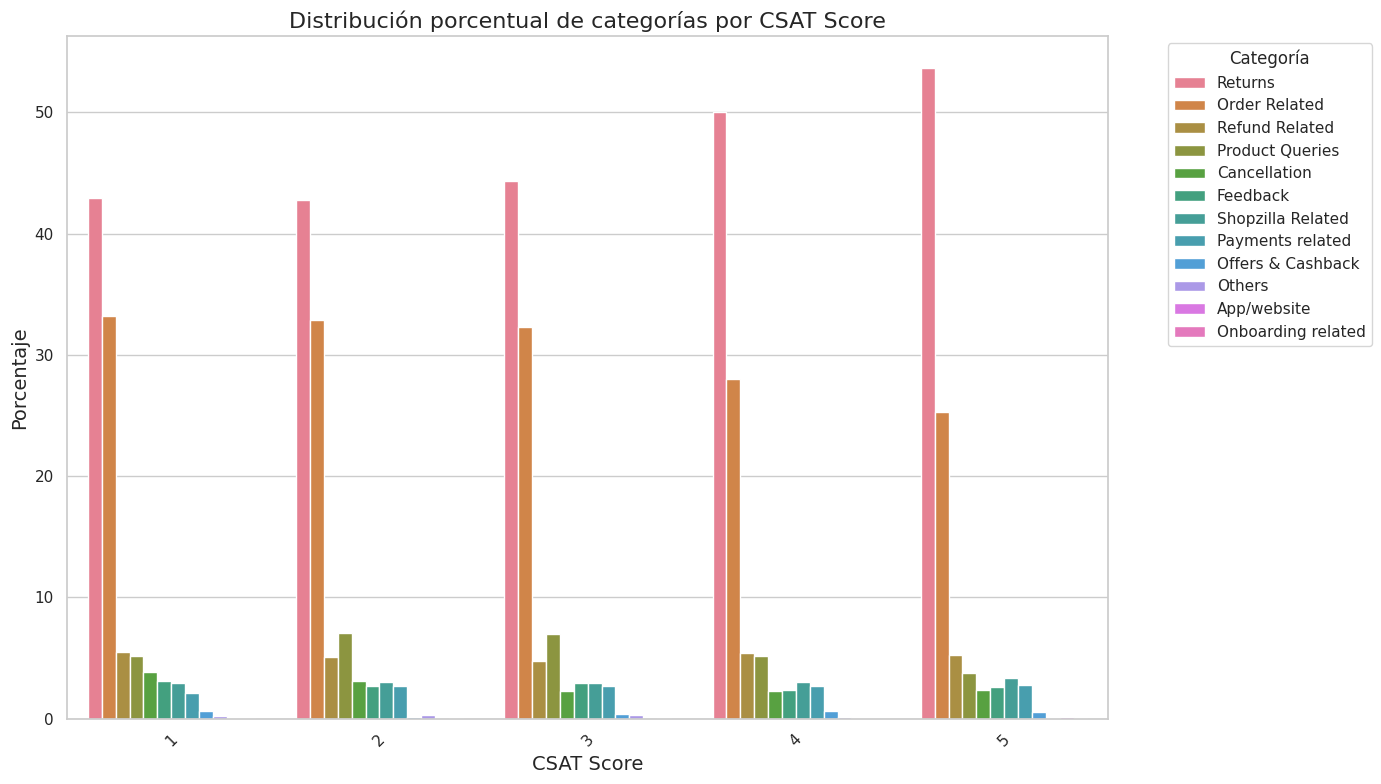

In [30]:
# Calcular el porcentaje de ocurrencia de cada categoría en 'category' para cada valor único de 'CSAT Score'
percentage_distribution = data.groupby('CSAT Score')['category'].value_counts(normalize=True) * 100

# Asignar nombres a las columnas
percentage_distribution = percentage_distribution.rename('percentage').reset_index()

# Imprimir el resultado
print(percentage_distribution)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
sns.barplot(x='CSAT Score', y='percentage', hue='category', data=percentage_distribution)

# Mejorar el gráfico
plt.title('Distribución porcentual de categorías por CSAT Score', fontsize=16)
plt.xlabel('CSAT Score', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En todos los niveles de satisfacción, la categoría predominante es "Returns", lo que sugiere que las devoluciones son la principal razón de satisfacción o insatisfacción de los clientes. A esto le sigue la categoría "Order Related", que abarca consultas o problemas relacionados con los pedidos. Las demás categorías aparecen con porcentajes menores.

# Subcategorías en la satisfacción del cliente

1. **Reverse Pickup Enquiry**: Consultas sobre la recogida inversa de productos.
2. **Delayed**: Problemas relacionados con retrasos en la entrega o procesamiento de pedidos.
3. **Refund Related Issues**: Problemas relacionados con reembolsos.
4. **Order Status Enquiry**: Consultas sobre el estado del pedido.
5. **Exchange / Replacement**: Consultas o solicitudes de cambio o reemplazo de productos.
6. **Installation/demo**: Solicitudes o problemas relacionados con la instalación o demostración de productos.
7. **General Enquiry**: Consultas generales no específicas.
8. **Fraudulent User**: Problemas relacionados con usuarios fraudulentos.
9. **Missing**: Productos faltantes en el pedido.
10. **Return Request**: Solicitudes de devolución de productos.
11. **Priority Delivery**: Solicitudes o problemas relacionados con la entrega prioritaria.
12. **Refund Enquiry**: Consultas sobre el estado de los reembolsos.
13. **Invoice Request**: Solicitudes de facturas.
14. **Online Payment Issues**: Problemas relacionados con pagos en línea.
15. **Seller Cancelled Order**: Pedidos cancelados por el vendedor.
16. **Wrong**: Productos incorrectos recibidos.
17. **Not Needed**: Productos ya no necesarios por el cliente.
18. **Service Centres Related**: Problemas relacionados con los centros de servicio.
19. **Unprofessional Behaviour**: Comportamiento no profesional del personal.
20. **Product Specific Information**: Consultas sobre información específica del producto.
21. **Customer Requested Modifications**: Modificaciones solicitadas por el cliente en el pedido o producto.
22. **Product Related Issues**: Problemas relacionados con los productos.
23. **Self-Help**: Uso de recursos de autoayuda para resolver problemas.
24. **Unable to Login**: Problemas para iniciar sesión.
25. **Shopzilla Premium Related**: Consultas o problemas relacionados con Shopzilla Premium.
26. **Signup Issues**: Problemas relacionados con el registro.
27. **Call Back Request**: Solicitudes de devolución de llamada.
28. **Other Cashback**: Consultas o problemas relacionados con otras formas de devolución de efectivo.
29. **Technician Visit**: Solicitudes o problemas relacionados con la visita de un técnico.
30. **Payment Related Queries**: Consultas relacionadas con pagos.
31. **Service Center - Service Denial**: Negativa de servicio en centros de servicio.
32. **Payment Pending**: Pagos pendientes.
33. **Unable to Track**: Incapacidad para rastrear pedidos.
34. **Return Cancellation**: Cancelación de devoluciones.
35. **COD Refund Details**: Detalles sobre reembolsos contra reembolso (COD).
36. **Instant Discount**: Descuentos instantáneos.
37. **Damaged**: Productos dañados.
38. **Account Updation**: Actualización de la cuenta.
39. **PayLater Related**: Consultas o problemas relacionados con PayLater.
40. **Wallet Related**: Consultas o problemas relacionados con billeteras digitales.
41. **Issues with Shopzilla App**: Problemas relacionados con la aplicación de Shopzilla.
42. **Call Disconnected**: Llamadas desconectadas.
43. **Billing Related**: Problemas relacionados con la facturación.
44. **Affiliate Offers**: Consultas o problemas relacionados con ofertas de afiliados.
45. **Other Account Related Issues**: Otros problemas relacionados con la cuenta.
46. **Order Verification**: Verificación de pedidos.
47. **Warranty Related**: Problemas relacionados con la garantía.
48. **Shopzilla Rewards**: Consultas o problemas relacionados con las recompensas de Shopzilla.
49. **e-Gift Voucher**: Consultas o problemas relacionados con vales de regalo electrónicos.
50. **Seller Onboarding**: Problemas relacionados con la incorporación de vendedores.
51. **Non Order Related**: Consultas no relacionadas con pedidos.
52. **Life Insurance**: Consultas o problemas relacionados con seguros de vida.
53. **Others**: Otras consultas o problemas no especificados.
54. **Card/EMI**: Consultas o problemas relacionados con tarjetas de crédito o EMI (Equated Monthly Installments).
55. **App/Website Related**: Problemas relacionados con la aplicación móvil o el sitio web.


In [31]:
data.groupby(['CSAT Score','Sub-category']).size()

CSAT Score  Sub-category       
1           Account updation         34
            Affiliate Offers         34
            App/website Related       1
            Billing Related           2
            COD Refund Details       16
                                   ... 
5           Unable to track         120
            Wallet related          171
            Warranty related         46
            Wrong                  2049
            e-Gift Voucher           23
Length: 254, dtype: int64

In [32]:
top_10_categories = data['Sub-category'].value_counts().nlargest(10).index
filtered_data = data[data['Sub-category'].isin(top_10_categories)]


# Calcular el porcentaje de ocurrencia de cada categoría en 'category' para cada valor único de 'CSAT Score'
percentage_distribution = filtered_data.groupby('CSAT Score')['Sub-category'].value_counts(normalize=True) * 100

# Asignar nombres a las columnas
percentage_distribution = percentage_distribution.rename('percentage')

# Imprimir el resultado
percentage_distribution

CSAT Score  Sub-category                
1           Reverse Pickup Enquiry          39.131501
            Delayed                         16.388616
            Order status enquiry            11.751717
            Installation/demo               10.095682
            Product Specific Information     6.894014
            Return request                   4.906771
            Refund Enquiry                   3.851816
            Fraudulent User                  2.931796
            Wrong                            2.342983
            Missing                          1.705103
2           Reverse Pickup Enquiry          37.063655
            Delayed                         13.141684
            Order status enquiry            11.396304
            Installation/demo               11.293634
            Product Specific Information     9.240246
            Return request                   6.878850
            Refund Enquiry                   3.901437
            Wrong                        

    CSAT Score                  Sub-category  percentage
0            1        Reverse Pickup Enquiry   39.131501
1            1                       Delayed   16.388616
2            1          Order status enquiry   11.751717
3            1             Installation/demo   10.095682
4            1  Product Specific Information    6.894014
5            1                Return request    4.906771
6            1                Refund Enquiry    3.851816
7            1               Fraudulent User    2.931796
8            1                         Wrong    2.342983
9            1                       Missing    1.705103
10           2        Reverse Pickup Enquiry   37.063655
11           2                       Delayed   13.141684
12           2          Order status enquiry   11.396304
13           2             Installation/demo   11.293634
14           2  Product Specific Information    9.240246
15           2                Return request    6.878850
16           2                R

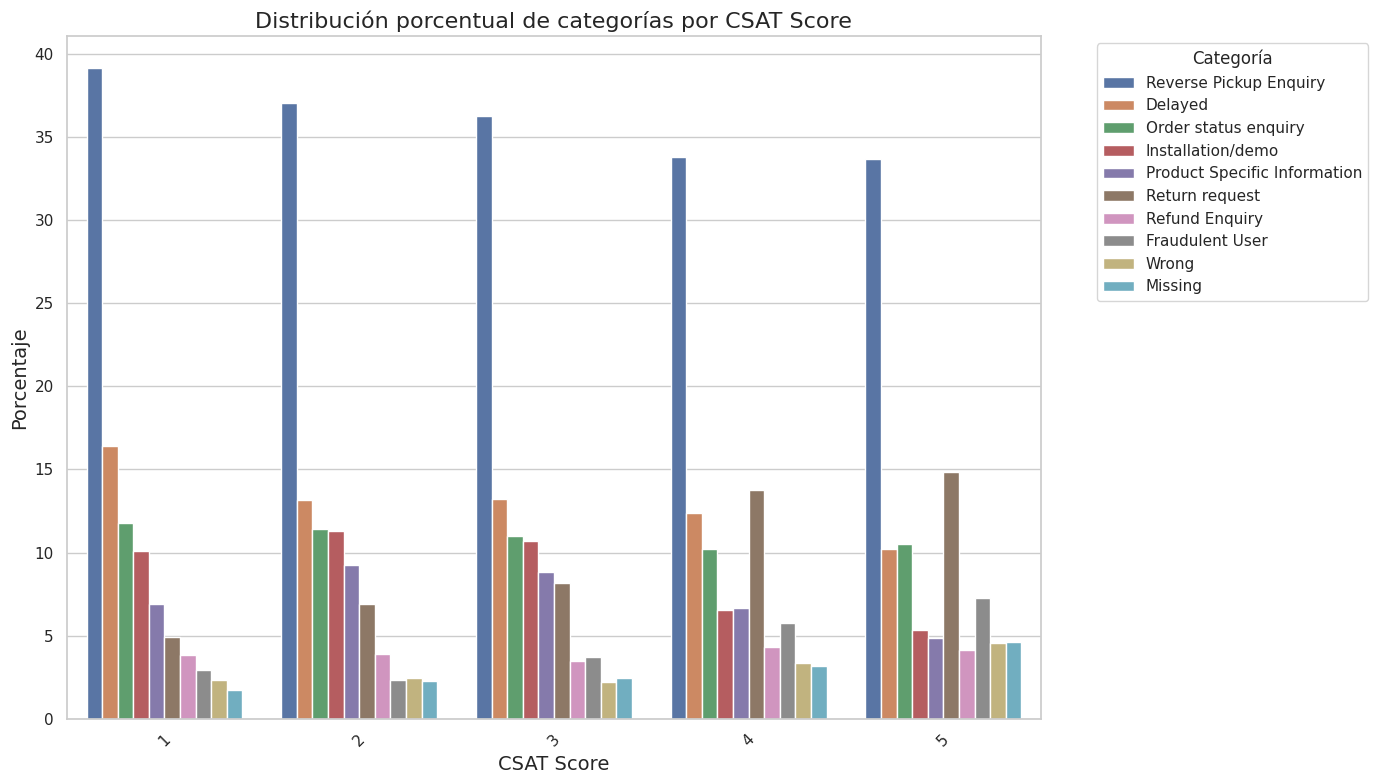

In [33]:


# Asignar nombres a las columnas
percentage_distribution = percentage_distribution.rename('percentage').reset_index()

# Imprimir el resultado
print(percentage_distribution)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
sns.barplot(x='CSAT Score', y='percentage', hue='Sub-category', data=percentage_distribution)

# Mejorar el gráfico
plt.title('Distribución porcentual de categorías por CSAT Score', fontsize=16)
plt.xlabel('CSAT Score', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En la categoría de satisfacción del cliente, se puede observar que para todas las categorías de satisfacción, la mayor cantidad de consultas son sobre la "recogida de productos para devolución". Esto es seguido por problemas con "retrasos en la entrega del producto", especialmente en los niveles de menor satisfacción. Otra consulta común es sobre el "estado de la compra" que se da para las categória de mayor satifacción.


### Correlación 

Para el estudio de la correlación, se convierten todas las categorías en valores numéricos."

In [34]:

for column in data.columns:
    unique_elements = data[column].nunique()
    print(f'La categoría de "{column}" tiene los siguientes elementos únicos: {unique_elements}')

La categoría de "channel_name" tiene los siguientes elementos únicos: 3
La categoría de "category" tiene los siguientes elementos únicos: 12
La categoría de "Sub-category" tiene los siguientes elementos únicos: 57
La categoría de "Agent_name" tiene los siguientes elementos únicos: 1371
La categoría de "Supervisor" tiene los siguientes elementos únicos: 40
La categoría de "Manager" tiene los siguientes elementos únicos: 6
La categoría de "Tenure Bucket" tiene los siguientes elementos únicos: 5
La categoría de "Agent Shift" tiene los siguientes elementos únicos: 5
La categoría de "CSAT Score" tiene los siguientes elementos únicos: 5
La categoría de "issue_reported_year" tiene los siguientes elementos únicos: 1
La categoría de "issue_reported_month" tiene los siguientes elementos únicos: 2
La categoría de "issue_reported_day" tiene los siguientes elementos únicos: 31
La categoría de "issue_reported_hour" tiene los siguientes elementos únicos: 24
La categoría de "issue_responded_year" tien

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
var_cate = data.select_dtypes(include='object').columns

In [37]:
encoder = LabelEncoder()
encoder = LabelEncoder()

for column in var_cate:
    data[column] = encoder.fit_transform(data[column])

In [38]:

for column in data.columns:
    unique_elements = data[column].nunique()
    print(f'La categoría de "{column}" tiene los siguientes elementos únicos: {unique_elements}')

La categoría de "channel_name" tiene los siguientes elementos únicos: 3
La categoría de "category" tiene los siguientes elementos únicos: 12
La categoría de "Sub-category" tiene los siguientes elementos únicos: 57
La categoría de "Agent_name" tiene los siguientes elementos únicos: 1371
La categoría de "Supervisor" tiene los siguientes elementos únicos: 40
La categoría de "Manager" tiene los siguientes elementos únicos: 6
La categoría de "Tenure Bucket" tiene los siguientes elementos únicos: 5
La categoría de "Agent Shift" tiene los siguientes elementos únicos: 5
La categoría de "CSAT Score" tiene los siguientes elementos únicos: 5
La categoría de "issue_reported_year" tiene los siguientes elementos únicos: 1
La categoría de "issue_reported_month" tiene los siguientes elementos únicos: 2
La categoría de "issue_reported_day" tiene los siguientes elementos únicos: 31
La categoría de "issue_reported_hour" tiene los siguientes elementos únicos: 24
La categoría de "issue_responded_year" tien

In [39]:
data.dtypes

channel_name             int64
category                 int64
Sub-category             int64
Agent_name               int64
Supervisor               int64
Manager                  int64
Tenure Bucket            int64
Agent Shift              int64
CSAT Score               int64
issue_reported_year      int32
issue_reported_month     int32
issue_reported_day       int32
issue_reported_hour      int32
issue_responded_year     int32
issue_responded_month    int32
issue_responded_day      int32
issue_responded_hour     int32
survey_response_year     int32
survey_response_month    int32
survey_response_day      int32
survey_response_hour     int32
dtype: object

<Axes: >

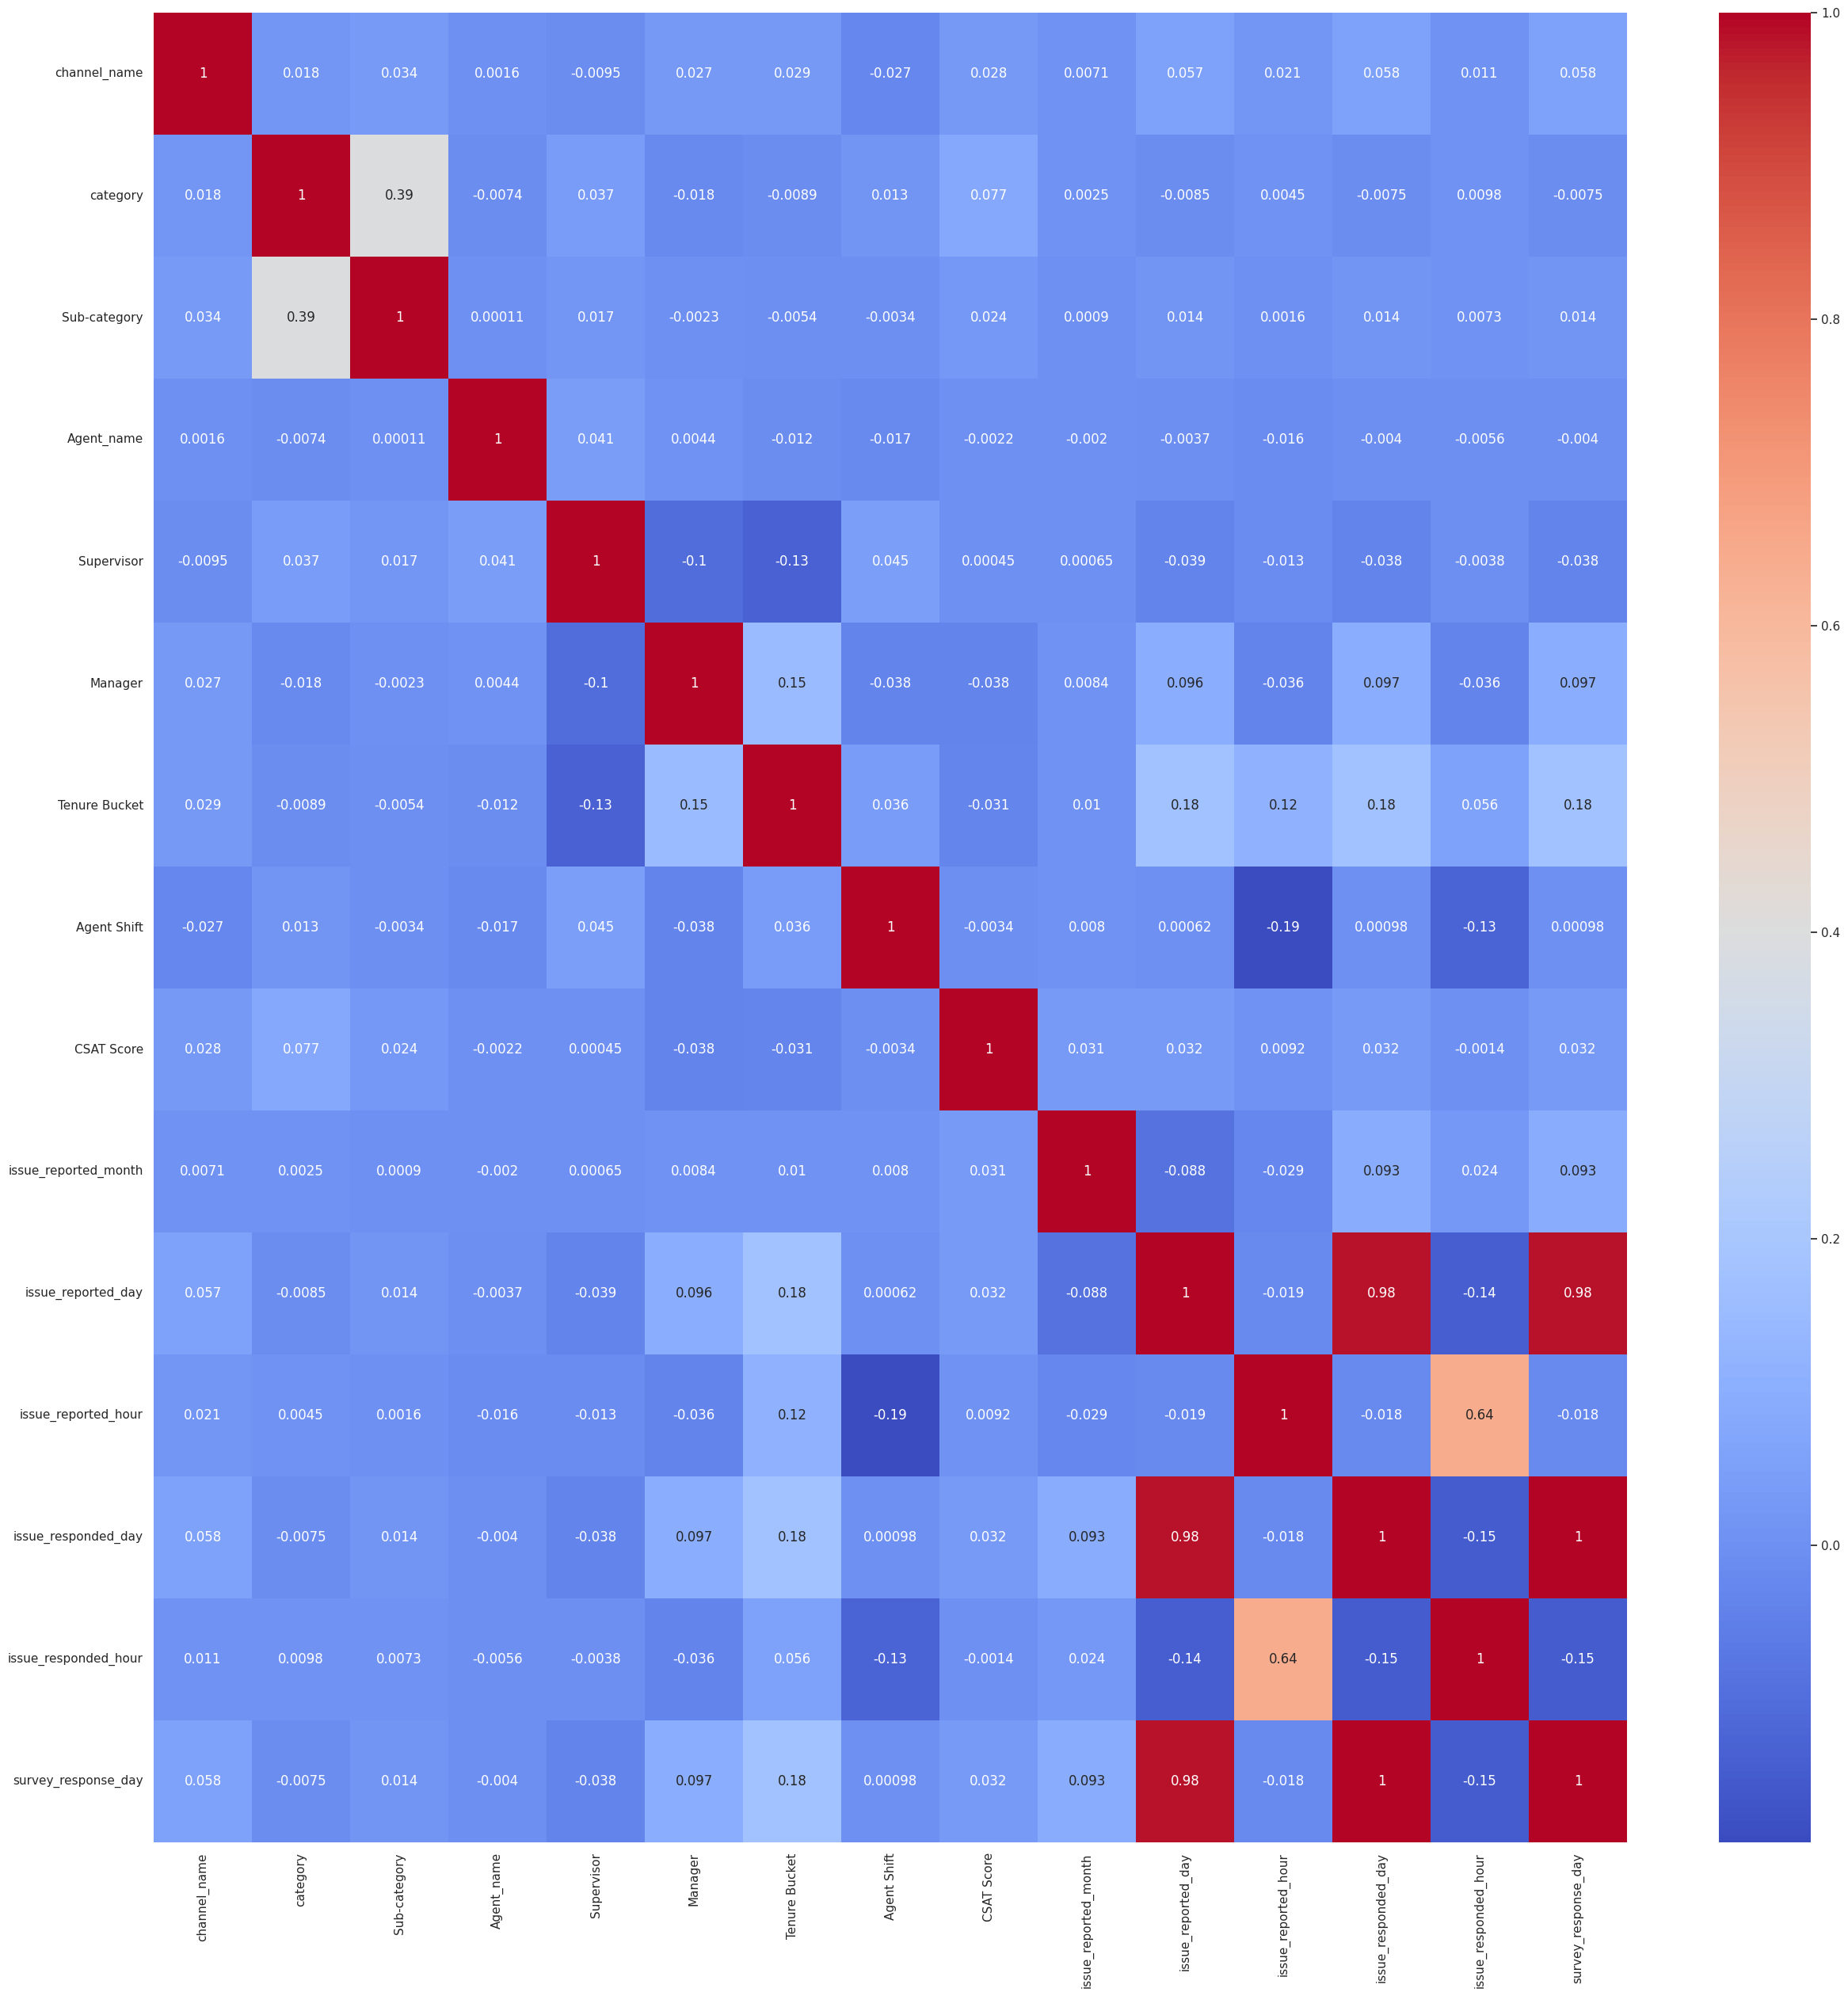

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(data.drop(['survey_response_year','survey_response_month','issue_reported_year','issue_responded_month','survey_response_year','issue_responded_year','survey_response_hour'],axis=1).corr(), annot=True,cmap='coolwarm')

In [41]:
import pandas as pd
import numpy as np

# Calcular la matriz de correlación
data_corr = data.drop(['survey_response_year', 'survey_response_month', 'issue_reported_year', 'issue_responded_month', 'survey_response_year', 'issue_responded_year', 'survey_response_hour'], axis=1).corr()

# Filtrar las posiciones de las columnas con correlación mayor a 0.5 y diferente de 1
high_corr_positions = (data_corr > 0.5) & (data_corr < 1)

# Crear una lista para almacenar las correlaciones y sus posiciones
high_corr_columns = []

# Iterar sobre la matriz de correlación y obtener los valores y sus posiciones
for row, col in zip(*np.where(high_corr_positions)):
    high_corr_columns.append((data_corr.index[row], data_corr.columns[col], data_corr.iloc[row, col]))

# Imprimir las posiciones y los valores de correlación
print("Columnas con correlación mayor a 0.5 y diferente de 1:")
for col1, col2, value in high_corr_columns:
    print(f"Correlación entre {col1} y {col2}: {value}")


Columnas con correlación mayor a 0.5 y diferente de 1:
Correlación entre issue_reported_day y issue_responded_day: 0.9825378930436806
Correlación entre issue_reported_day y survey_response_day: 0.9825378930436806
Correlación entre issue_reported_hour y issue_responded_hour: 0.6421057986585503
Correlación entre issue_responded_day y issue_reported_day: 0.9825378930436806
Correlación entre issue_responded_hour y issue_reported_hour: 0.6421057986585503
Correlación entre survey_response_day y issue_reported_day: 0.9825378930436806


Las variables que presentan la mayor correlación son "Issue reported" y "Issue responded", con una correlación casi de uno y positiva. Esto indica que los problemas reportados son respondidos casi al mismo tiempo que se reportan.


In [42]:
data.to_csv('../data/processed/data_eda.csv', index=False)